## **1.0 INTRODUCTION**

As Malaysia continues to advance in digital healthcare and public health surveillance, data-driven insights have become increasingly vital in managing and mitigating the spread of infectious diseases. The COVID-19 pandemic has highlighted the urgent need for robust data management, analysis, and visualization techniques to support real-time decision-making and resource allocation in the healthcare sector. Similarly, the rising prevalence of other infectious diseases such as sexually transmitted diseases (STDs) poses significant public health challenges that require timely monitoring and intervention.

### **1.1 PROBLEM STATEMENT** 

Infectious diseases continue to present major health concerns in Malaysia, especially in the wake of the COVID-19 pandemic. Despite the availability of large volumes of health-related data, there exists a gap in transforming these raw datasets into meaningful insights that can drive policy and public health decisions. Specifically, there is a need to explore how the trends of COVID-19 and sexually transmitted diseases have evolved across different regions and time periods in Malaysia.

### **1.2 OBJECTIVES**

This study aims to uncover patterns, identify hotspots, and generate actionable insights that can inform healthcare planning, disease prevention, and public awareness initiatives. 

## **2.0 DATA COLLECTION**

This project leverages open-access healthcare data from Data.gov.my, focusing on infectious disease statistics across Malaysia, particularly COVID-19 and STD cases. Through effective data cleaning using Hadoop System (Apache Hive), visualization, and interpretation, this project underscores the critical role of data management in shaping public health strategies and outcomes. For this project, two datasets will be analyzed to extract valuable insights through descriptive statistical methods and visualizations. The datasets include:

1. Sexually Transmitted Diseases (STDs) cases: STDs cases such as AIDS, HIV, chancroid, gonorrhea, syphillis cases across from 2017 to 2022.
2. COVID-19 cases : COVID-19 cases includes new cases, imported cases and recovered cases across Malaysia from 2020 to 2025.

## **3.0 DATA PREPROCESSING** 

In this stage, the apache hive was used for preprocessing such as aggregating the value, re-formating the date to ensure the standardization and can be further analyse through visualization 

In [ ]:
#Import necessary libraries
import pandas as pd #for data manipulation
from impala.dbapi import connect #connecting with Apache Hive 
import matplotlib.pyplot as plt #for data visualization
import seaborn as sns #for data visualization
import geopandas as gpd #for mapping data

import warnings #for ignoring unrelevant ouput notifications
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
# Establish connection
conn = connect(
    host='127.0.0.1',
    port=10000,
    user='maria_dev',
    database='foodmart',
    auth_mechanism='PLAIN'
)

cursor = conn.cursor()

# Fixed query
query = '''
SELECT 
    year(record_date) AS year,
    state,
    disease,
    AVG(cases) AS avg_cases,
    AVG(incidence) AS avg_incidence
FROM std_state
GROUP BY year(record_date), state, disease
ORDER BY year, state, disease
'''

# Execute query
cursor.execute(query)

# Fetch data and column names
data = cursor.fetchall()
columns = [col[0] for col in cursor.description]

# Create DataFrame
df = pd.DataFrame(data, columns=columns)

# Preview results
df.head(10)

,year,state,disease,avg_cases,avg_incidence
0,2017,Johor,aids,178.0,4.72
1,2017,Johor,chancroid,1.0,0.03
2,2017,Johor,gonorrhea,404.0,10.72
3,2017,Johor,hiv,347.0,9.20
4,2017,Johor,syphillis,295.0,7.82
5,2017,Kedah,aids,40.0,1.84
6,2017,Kedah,chancroid,0.0,0.00
7,2017,Kedah,gonorrhea,118.0,5.42
8,2017,Kedah,hiv,187.0,8.60
9,2017,Kedah,syphillis,83.0,3.82


In [17]:
df.sample(10)

,year,state,disease,avg_cases,avg_incidence
454,2022,Sabah,syphillis,304.0,8.97
442,2022,Perlis,gonorrhea,5.0,1.73
219,2019,Sarawak,syphillis,549.0,19.52
325,2021,Kedah,aids,35.0,1.60
147,2018,Terengganu,gonorrhea,69.0,5.54
72,2017,W.P. Kuala Lumpur,gonorrhea,294.0,15.05
216,2019,Sarawak,chancroid,2.0,0.07
459,2022,Sarawak,syphillis,673.0,27.24
440,2022,Perlis,aids,12.0,4.14
7,2017,Kedah,gonorrhea,118.0,5.42


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           480 non-null    int64  
 1   state          480 non-null    object 
 2   disease        480 non-null    object 
 3   avg_cases      480 non-null    float64
 4   avg_incidence  480 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 18.9+ KB


In [19]:
# Establish connection
conn = connect(
    host='127.0.0.1',
    port=10000,
    user='maria_dev',
    database='foodmart',
    auth_mechanism='PLAIN'
)

cursor2 = conn.cursor()

# Fixed query
query2 = '''
SELECT 
    year(record_date) AS year,
    state,
    AVG(cases_new) AS avg_new_cases,
    AVG(cases_import) AS avg_import_cases,
    AVG(cases_recovered) AS avg_cases_recovered
FROM covid_cases
GROUP BY year(record_date), state
ORDER BY year
'''

# Execute query
cursor2.execute(query2)

# Fetch data and column names
data2 = cursor2.fetchall()
columns2 = [col[0] for col in cursor2.description]

# Create DataFrame
covid_cases = pd.DataFrame(data2, columns=columns2)

# Preview results
covid_cases.head(10)

,year,state,avg_new_cases,avg_import_cases,avg_cases_recovered
0,2020,Kedah,8.842105,0.052632,8.400585
1,2020,Kelantan,2.216374,0.055556,1.453216
2,2020,Malaysia,330.438596,6.061404,260.058480
3,2020,Melaka,3.581871,0.263158,1.959064
4,2020,Negeri Sembilan,22.888889,0.675439,20.780702
5,2020,Pahang,3.991228,0.064327,2.461988
6,2020,Perak,9.342105,0.090643,8.429825
7,2020,Perlis,0.134503,0.011696,0.125731
8,2020,Johor,16.766082,0.418129,8.257310
9,2020,Pulau Pinang,10.198830,0.049708,8.900585


In [57]:
covid_cases.sample(10)

,year,state,avg_new_cases,avg_import_cases,avg_cases_recovered
55,2023,Melaka,38.865753,0.367123,38.145205
33,2021,W.P. Putrajaya,24.950685,0.106849,23.887671
100,2025,W.P. Labuan,0.121951,0.000000,0.138211
93,2025,Perlis,0.520325,0.000000,0.560976
95,2025,Sabah,1.853659,0.008130,2.032520
34,2022,Johor,418.747945,6.043836,424.832877
51,2023,Johor,24.997260,0.320548,19.561644
86,2025,Kedah,4.000000,0.016260,4.219512
54,2023,Malaysia,556.060274,1.449315,513.983562
23,2021,Negeri Sembilan,289.687671,0.608219,284.087671


In [21]:
covid_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 102 non-null    int64  
 1   state                102 non-null    object 
 2   avg_new_cases        102 non-null    float64
 3   avg_import_cases     102 non-null    float64
 4   avg_cases_recovered  102 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 4.1+ KB


In [22]:
df['year'].min()

2017

In [23]:
df.sample(10)

,year,state,disease,avg_cases,avg_incidence
133,2018,Sabah,hiv,211.0,5.38
216,2019,Sarawak,chancroid,2.0,0.07
129,2018,Pulau Pinang,syphillis,175.0,9.90
298,2020,Sarawak,hiv,244.0,8.67
445,2022,Pulau Pinang,aids,34.0,1.96
424,2022,Melaka,syphillis,216.0,21.43
108,2018,Negeri Sembilan,hiv,133.0,11.66
2,2017,Johor,gonorrhea,404.0,10.72
56,2017,Sarawak,chancroid,0.0,0.00
474,2022,W.P. Kuala Lumpur,syphillis,523.0,25.32


In [24]:
df['year'].max()

2022

## **4.0 DATA VISUALIZATION**

### **4.1 COVID-19 Cases in Malaysia by Year**

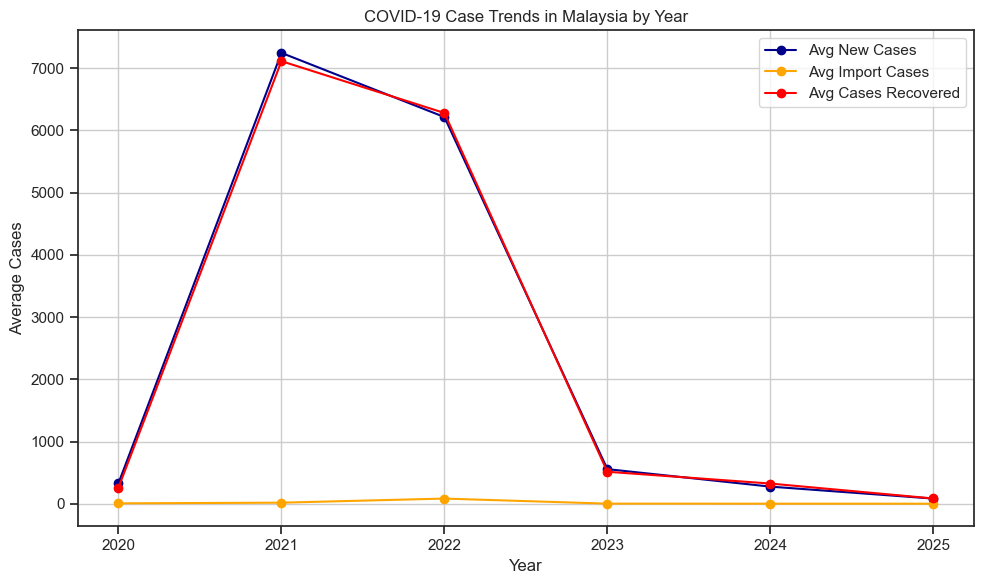

In [ ]:
# Filter only for Malaysia
df_malaysia = covid_cases[covid_cases['state'] == 'Malaysia'].sort_values(by='year')

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_malaysia['year'], df_malaysia['avg_new_cases'], marker='o', label='Avg New Cases', color='darkblue')
plt.plot(df_malaysia['year'], df_malaysia['avg_import_cases'], marker='o', label='Avg Import Cases', color='orange')
plt.plot(df_malaysia['year'], df_malaysia['avg_cases_recovered'], marker='o', label='Avg Cases Recovered', color='red')

plt.title('COVID-19 Case Trends in Malaysia by Year')
plt.xlabel('Year')
plt.ylabel('Average Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The figure illustrates the trend of COVID-19 cases in Malaysia from 2020 to 2025, as represented by the average number of new cases, imported cases, and recovered cases. The trend can be broadly categorized into three distinct phases that correspond to the different stages of the pandemic response and virus behavior over time.

During the first phase, between 2020 and 2021, the number of average new and recovered COVID-19 cases increased exponentially. This period marked the early phase of the pandemic, during which the virus spread rapidly across the globe, including in Malaysia. The surge in cases was driven by a combination of limited scientific understanding of the virus, absence of established vaccines, and delays in implementing containment strategies. The high transmissibility of SARS-CoV-2, along with the emergence of more infectious variants such as Alpha and Delta, further contributed to the sharp increase in case numbers (World Health Organization [WHO], 2020; Lai et al., 2021). Additionally, the expansion of mass testing during this period led to the detection of more cases, reflecting the growing scale of the outbreak.

The second phase, spanning from 2021 to 2023, shows a gradual decline in the number of cases. Several factors explain this downward trend. Firstly, vaccination campaigns that began globally in late 2020 gained momentum throughout 2021. Malaysia launched its National COVID-19 Immunisation Programme in early 2021, significantly increasing vaccination coverage among its population (Ministry of Health Malaysia, 2022). Secondly, public health measures such as mandatory mask-wearing, mobility restrictions, and social distancing were widely enforced, contributing to better control of viral transmission. The rollout of booster doses in late 2021 further enhanced population immunity against emerging variants. As a result, both the incidence and severity of cases began to decline, supported by evidence of reduced hospitalization and mortality rates due to vaccine effectiveness (Tan et al., 2022).

In the third and final phase, from 2023 to 2025, the trend of COVID-19 cases continued to decline and eventually stabilized at lower levels. This stage reflects the transition of COVID-19 from a pandemic to an endemic disease. By this time, a majority of the population had developed hybrid immunity in which can be gained through a combination of vaccination and natural infection (Kwok et al., 2023). Improved healthcare system preparedness, continued surveillance, and the availability of antiviral treatments such as Paxlovid played a critical role in containing new outbreaks. As Malaysia, along with other countries, gradually relaxed restrictions and reopened borders between 2022 and 2023, the virus remained in circulation but posed a significantly reduced public health threat. This stabilization phase underscores the long-term adaptation of society to COVID-19 through sustained immunity and improved public health infrastructure.

References:

Kwok, K. O., Lai, F., Wei, W. I., Wong, S. Y. S., & Tang, J. W. (2023). Herd immunity–estimating the level required to halt the COVID-19 epidemics in affected countries. Journal of Infection, 80(6), e32–e33. https://doi.org/10.1016/j.jinf.2020.03.036

Lai, C. C., Shih, T. P., Ko, W. C., Tang, H. J., & Hsueh, P. R. (2021). Severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2) and coronavirus disease-2019 (COVID-19): The epidemic and the challenges. International Journal of Antimicrobial Agents, 55(3), 105924. https://doi.org/10.1016/j.ijantimicag.2020.105924

Ministry of Health Malaysia. (2022). COVIDNOW: National COVID-19 Immunisation Programme. Retrieved from https://covidnow.moh.gov.my/

Tan, S. T., Kwan, A. T., Rodríguez-Barraquer, I., Singer, B. J., Park, H. J., Lewnard, J. A., & Lo, N. C. (2022). Infectiousness of SARS-CoV-2 breakthrough infections and reinfections during the Omicron wave. Nature Medicine, 28(7), 1490–1495. https://doi.org/10.1038/s41591-022-01816-0

World Health Organization (WHO). (2020). Coronavirus disease (COVID-19) pandemic. Retrieved from https://www.who.int/emergencies/diseases/novel-coronavirus-2019

### **4.2 COVID-19 Cases in Malaysia by State**

#### **4.2.1 New COVID-19 Cases by State (2020 - 2025)**

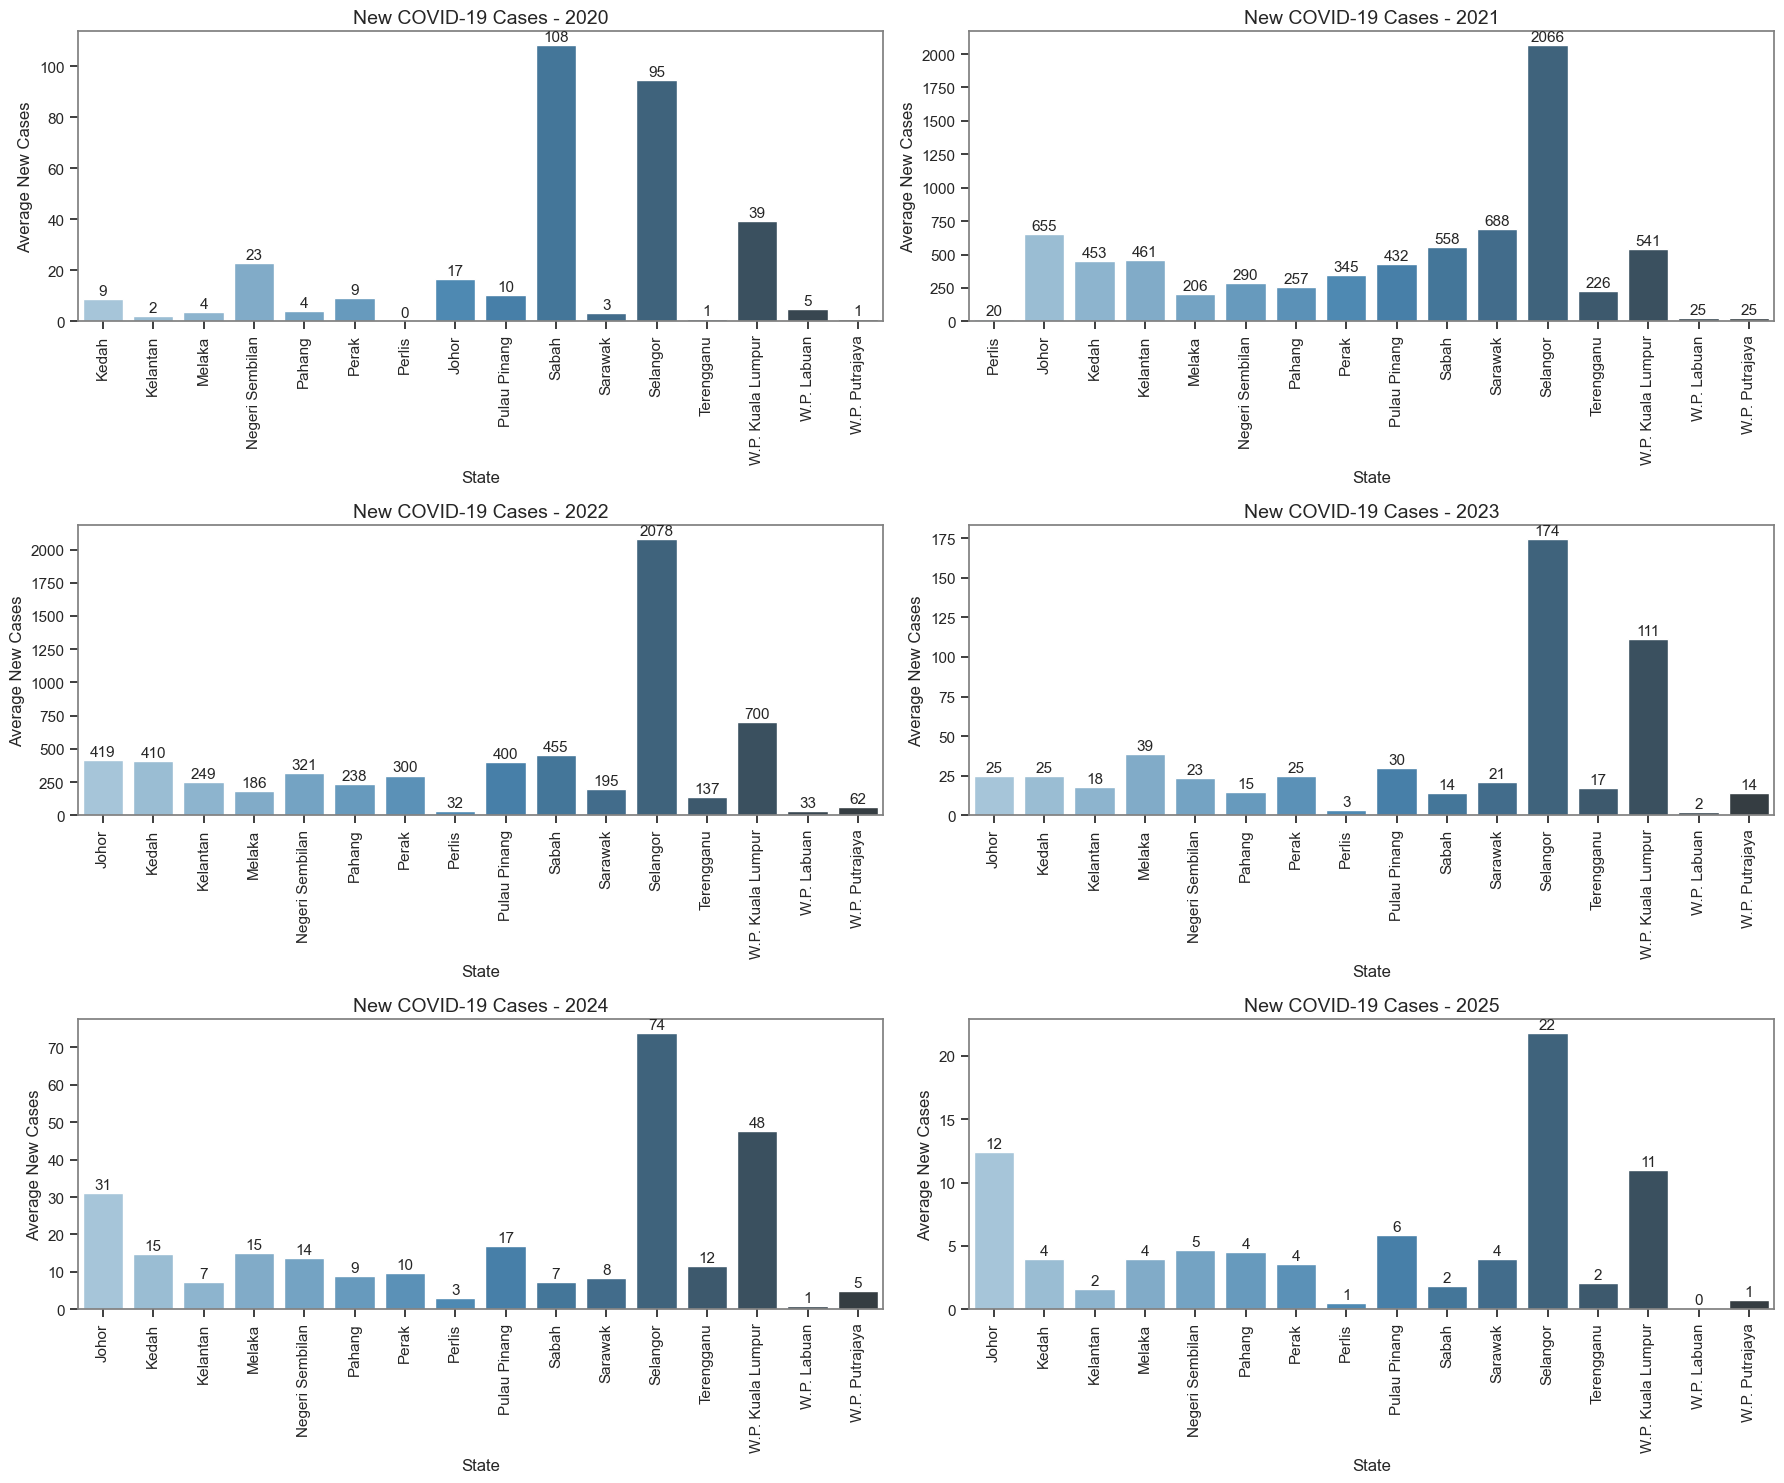

In [ ]:
df_malaysia = covid_cases[covid_cases['state'] != 'Malaysia']

# Ensure consistent style
sns.set(style="ticks")

# Define the years to visualize
years = [2020, 2021, 2022, 2023, 2024, 2025]

# Create subplots (3 rows x 2 columns)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 15))
axes = axes.flatten()

# Loop through each year and plot on a separate subplot
for i, year in enumerate(years):
    ax = axes[i]
    data_year = df_malaysia[df_malaysia['year'] == year]
   
    # Plot the barplot
    barplot = sns.barplot(
        data=data_year,
        x='state',
        y='avg_new_cases',
        ax=ax,
        palette='Blues_d'
    )
    
    # Add value labels to the top of each bar
    for container in barplot.containers:
        barplot.bar_label(container, fmt='%.0f', padding=0.75, fontsize=11)

    # Set titles and labels
    ax.set_title(f'New COVID-19 Cases - {year}', fontsize=14)
    ax.set_xlabel('State')
    ax.set_ylabel('Average New Cases')
    ax.tick_params(axis='x', rotation=90)

    # Set all plot borders to gray
    for spine in ax.spines.values():
        spine.set_edgecolor('gray')

# Adjust layout
plt.tight_layout()
plt.show()


The figure above presents a comprehensive overview of the average number of new COVID-19 cases across Malaysian states from 2020 to 2025. In 2020, the COVID-19 pandemic began to significantly impact Malaysia, with states such as Sabah, Selangor, W.P. Kuala Lumpur, and Negeri Sembilan recording notably higher average daily cases compared to others. These regions are among the most densely populated and urbanized areas in Malaysia, which could have contributed to the higher transmission rates due to increased population mobility, urban crowding, and socioeconomic activities (Tan et al., 2021).

In 2021, there was a stark increase in the number of average daily COVID-19 cases across almost all states, with Selangor reaching a peak of 2,066 cases, the highest in the country. This surge corresponds with the emergence of more transmissible variants of concern, such as the Delta variant, which had significantly higher rates of transmission and virulence. Additionally, 2021 was marked by the healthcare system's increasing burden, particularly in urban centers like Selangor and Kuala Lumpur, which serve as economic and administrative hubs (Ministry of Health Malaysia, 2021). The continued rise in 2022, with Selangor again registering the highest average at 2,078 cases, can be attributed to the residual impact of the Delta wave and the later emergence of the Omicron variant, which, while less severe, was highly transmissible (World Health Organization [WHO], 2022).

However, from 2023 onwards, the graphs illustrate a substantial decline in the average number of new cases across all states. This trend can be strongly associated with the widespread rollout and uptake of COVID-19 vaccines in Malaysia beginning mid-2021. Vaccination significantly reduced severe illness and transmission rates. By 2023, booster doses were also introduced, and Malaysia achieved high coverage among vulnerable populations, contributing to community immunity (Kow et al., 2022). Public health interventions, increased testing, contact tracing, and public compliance with standard operating procedures further played key roles in the containment of the virus. By 2025, all states recorded a minimal number of new daily cases, with Selangor, which had previously led in case numbers, now recording an average of just 22 new cases, indicating strong control over community spread.

In conclusion, the observed pattern in the graph reflects the natural course of the pandemic exacerbated by virus mutations and mitigated through robust public health responses, especially mass vaccination campaigns. The data highlights the importance of early interventions, health infrastructure readiness, and public cooperation in combating pandemics.

References:

Kow, C. S., Hasan, S. S., & Ramachandram, D. S. (2022). COVID-19 vaccination in Malaysia: Progress and challenges. Human Vaccines & Immunotherapeutics, 18(5), 2079007. https://doi.org/10.1080/21645515.2022.2079007

Ministry of Health Malaysia. (2021). COVID-19 Malaysia updates. Retrieved from https://covid-19.moh.gov.my/

Tan, M. P., Mokhtar, K. S., & Liew, C. F. (2021). Urban density and COVID-19 transmission in Malaysia: A spatial analysis. Malaysian Journal of Public Health Medicine, 21(2), 45-53.

World Health Organization. (2022). Weekly epidemiological update on COVID-19 – 1 March 2022. Retrieved from https://www.who.int/publications/m/item/weekly-epidemiological-update-on-covid-19---1-march-2022


#### **4.2.2 Import COVID-19 Cases By State (2020 - 2025)**

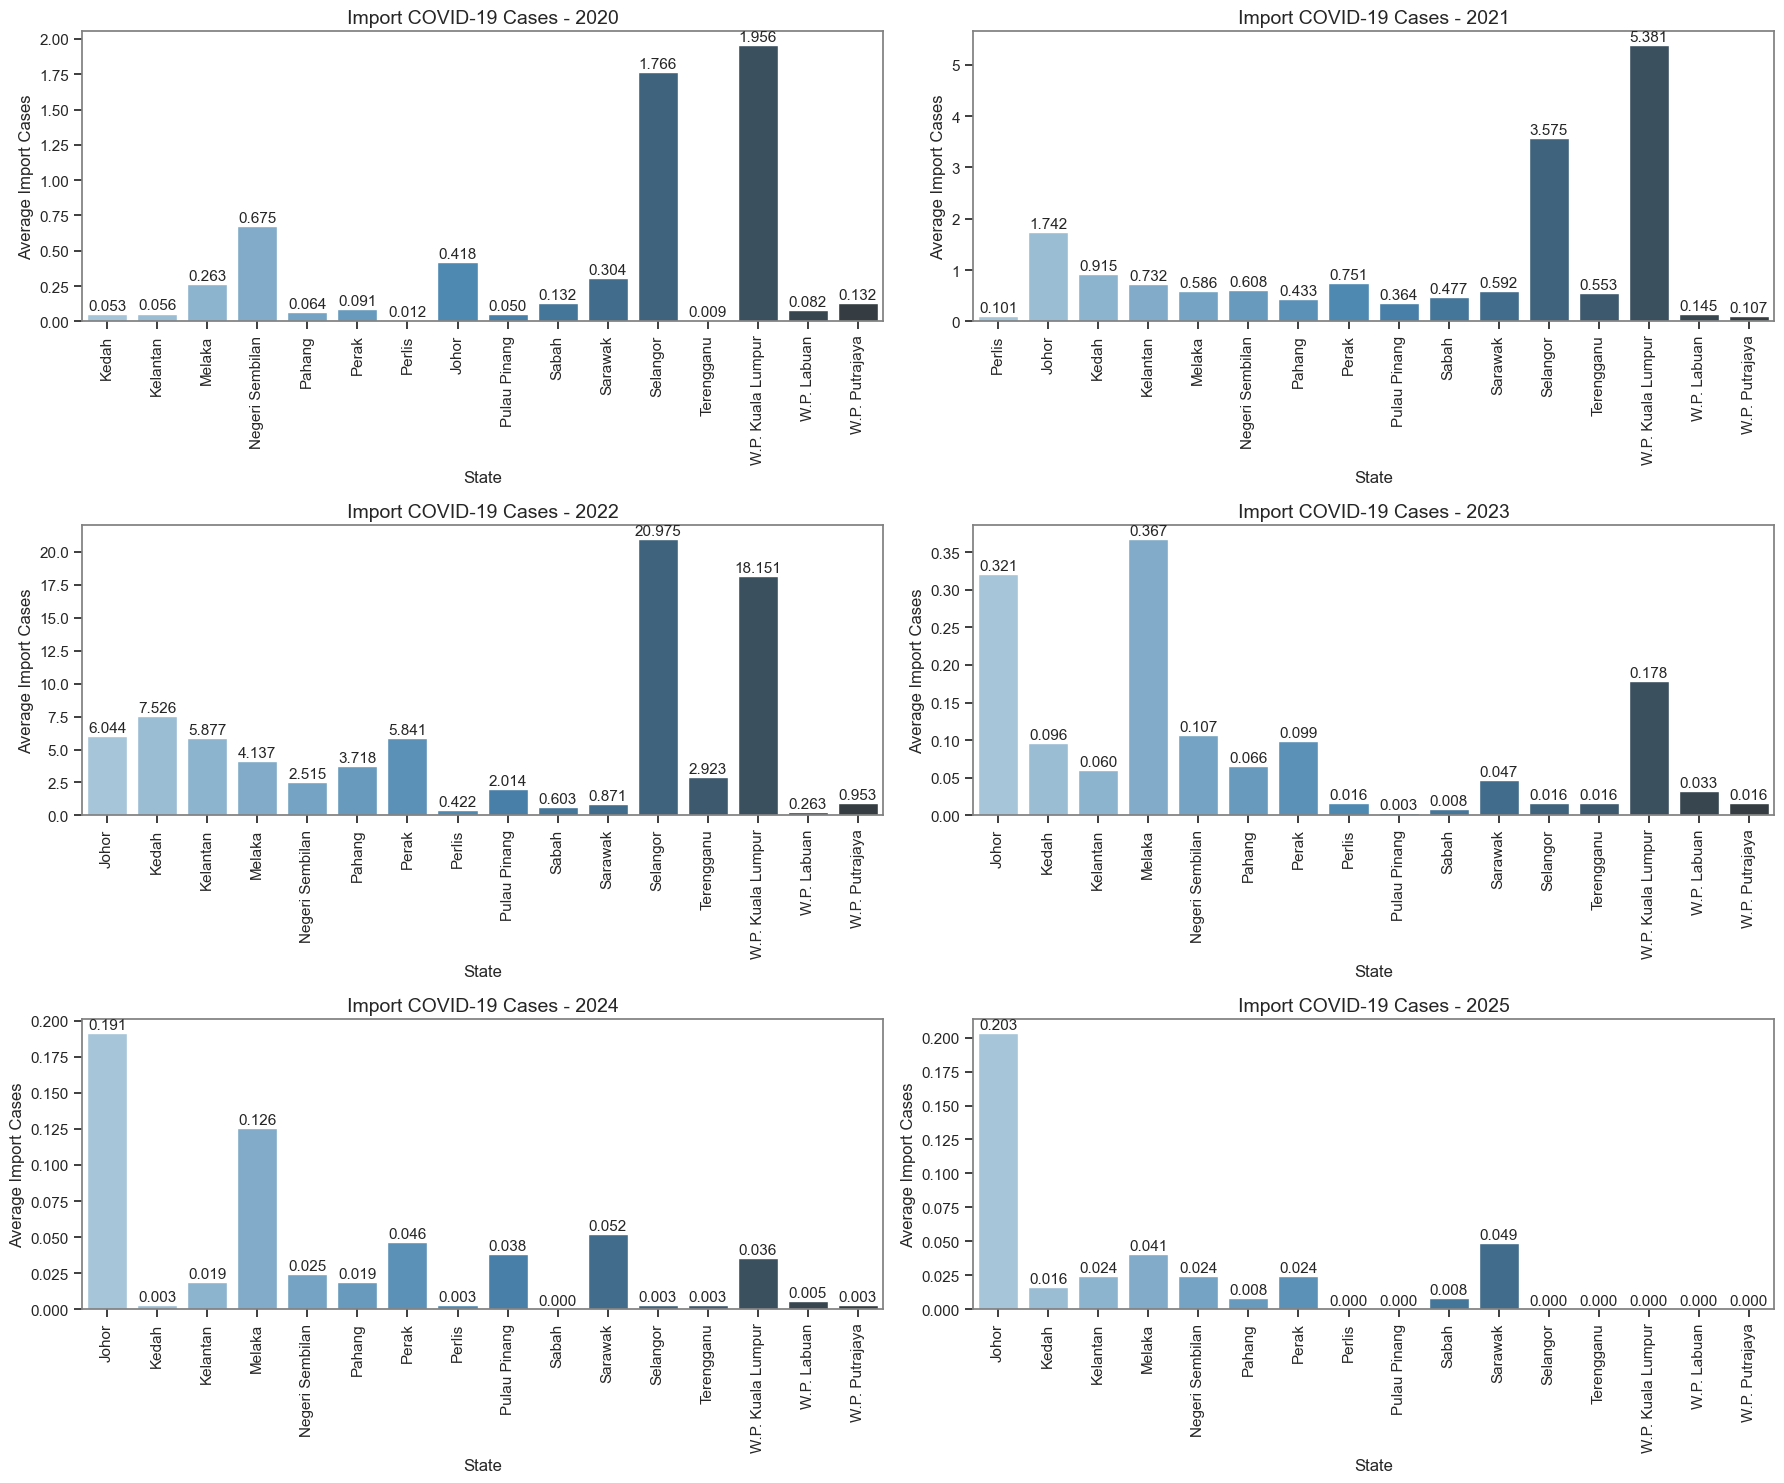

In [ ]:
# Ensure consistent style
sns.set(style="ticks")

# Create subplots (3 rows x 2 columns)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 15))
axes = axes.flatten()

## Loop through each year and plot on a separate subplot
for i, year in enumerate(years):
    ax = axes[i]
    data_year = df_malaysia[df_malaysia['year'] == year]
   
    # Plot the barplot
    barplot = sns.barplot(
        data=data_year,
        x='state',
        y='avg_import_cases',
        ax=ax,
        palette='Blues_d'
    )
    
    # Add value labels to the top of each bar
    for container in barplot.containers:
        barplot.bar_label(container, fmt='%.3f', padding=0.75, fontsize=11)

    # Set titles and labels
    ax.set_title(f'Import COVID-19 Cases - {year}', fontsize=14)
    ax.set_xlabel('State')
    ax.set_ylabel('Average Import Cases')
    ax.tick_params(axis='x', rotation=90)

    # Set all plot borders to gray
    for spine in ax.spines.values():
        spine.set_edgecolor('gray')


# Adjust layout
plt.tight_layout()
plt.show()

The data illustrated in the figure on imported COVID-19 cases across Malaysian states from 2020 to 2025 highlights a relatively lower magnitude of cases compared to new local transmissions within the country. In 2020, when international borders were still relatively open during the early stages of the pandemic, a number of imported cases were recorded, particularly in key urban and entry point states such as Selangor, Sabah, and W.P. Kuala Lumpur, with W.P. Kuala Lumpur registering the highest average of 1.956 cases per day. This trend aligns with the fact that Kuala Lumpur serves as a major international travel hub, housing the country's largest international airport, Kuala Lumpur International Airport (KLIA) (Immigration Department of Malaysia, 2020).

In 2021, despite increased border restrictions, there was a noticeable rise in imported cases in several states, with W.P. Kuala Lumpur (5.381) and Selangor (3.575) continuing to top the chart. This increase can be associated with the repatriation of citizens, return of expatriates, and travelers arriving for essential purposes, even amidst stringent Standard Operating Procedures (SOPs) such as mandatory quarantine and testing (Ministry of Health Malaysia, 2021). By 2022, the number of imported cases surged, particularly in Selangor (20.975), W.P. Kuala Lumpur (18.151), and Kedah (7.526). This spike may be attributed to the gradual reopening of international borders and the resumption of travel following the widespread administration of vaccines and improved global health measures. The influx of travelers and international mobility significantly contributed to this temporary rise in imported cases (World Health Organization [WHO], 2022).

However, from 2023 onwards, a marked decline in imported cases is observed, continuing into 2024 and 2025. For example, in 2025, all states recorded an average of fewer than 0.05 imported cases daily, with many states such as Terengganu and W.P. Labuan recording zero. This downward trend reflects the effectiveness of ongoing travel protocols, such as health screenings at points of entry, vaccination mandates for travelers, and declining global infection rates. Additionally, by this period, international travel patterns had not fully returned to pre-pandemic levels, which contributed to the reduction in imported cases (Kow et al., 2022).

In conclusion, while imported COVID-19 cases played a role in the initial seeding of the virus within Malaysia, especially in urban and internationally connected states, their overall impact remained minimal compared to the spread of new local cases. The containment of imported cases was largely successful due to the government's early and sustained focus on border control, quarantine enforcement, and public health surveillance measures.

References:

Immigration Department of Malaysia. (2020). Malaysia Immigration Statistics 2020. Retrieved from https://www.imi.gov.my

Kow, C. S., Hasan, S. S., & Ramachandram, D. S. (2022). COVID-19 vaccination in Malaysia: Progress and challenges. Human Vaccines & Immunotherapeutics, 18(5), 2079007. https://doi.org/10.1080/21645515.2022.2079007

Ministry of Health Malaysia. (2021). COVID-19 Malaysia updates. Retrieved from https://covid-19.moh.gov.my/

World Health Organization. (2022). Global epidemiological update: COVID-19 and international travel. Retrieved from https://www.who.int/publications

#### **4.2.3 Recovered COVID-19 Cases By State (2020 - 2025)**

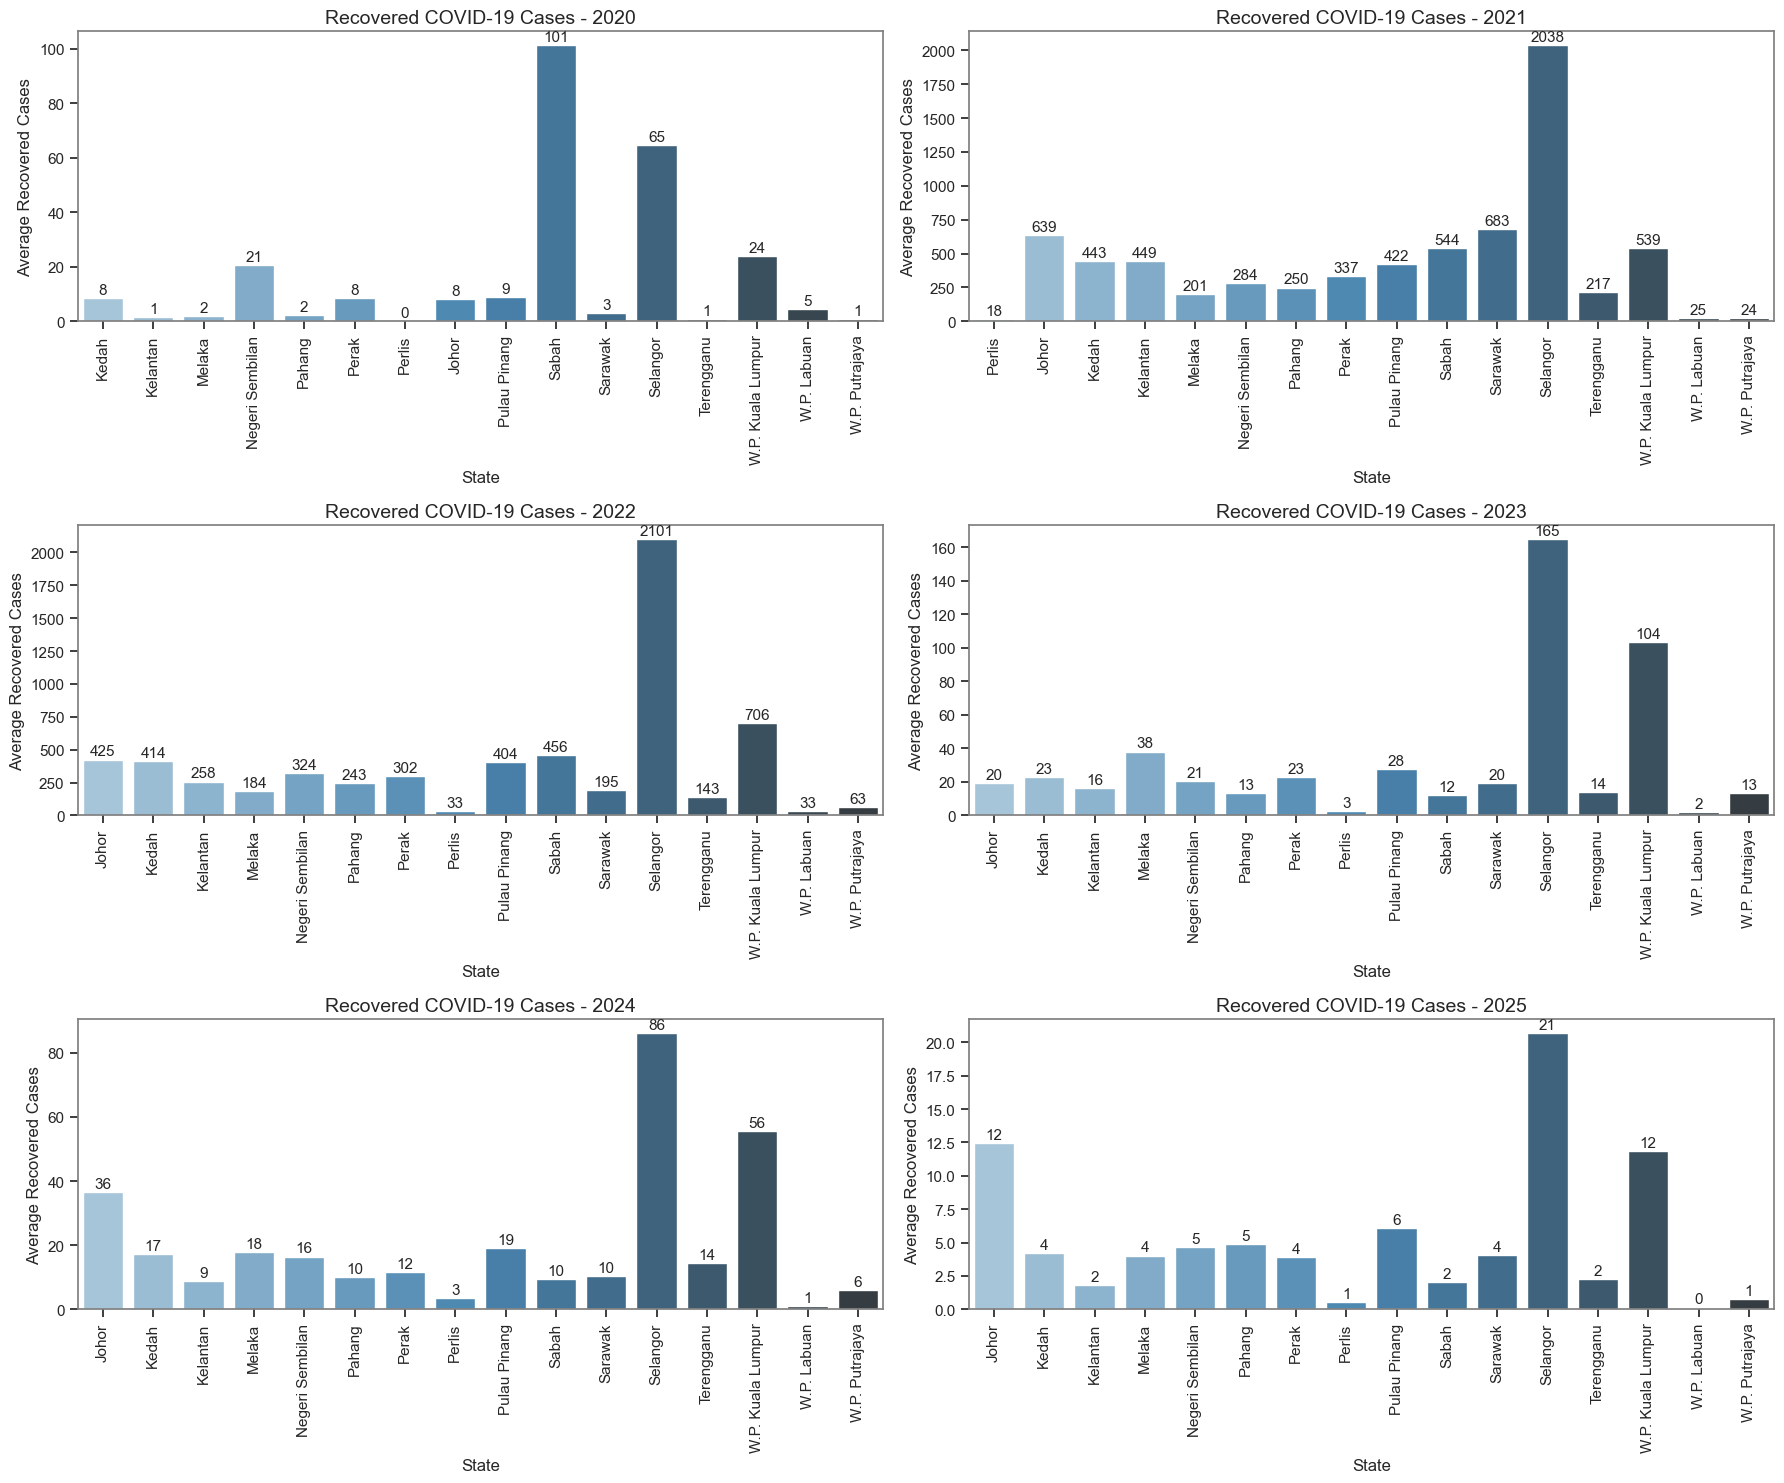

In [148]:
# Ensure consistent style
sns.set(style="ticks")

# Create subplots (3 rows x 2 columns)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 15))
axes = axes.flatten()

## Loop through each year and plot on a separate subplot
for i, year in enumerate(years):
    ax = axes[i]
    data_year = df_malaysia[df_malaysia['year'] == year]
   
    # Plot the barplot
    barplot = sns.barplot(
        data=data_year,
        x='state',
        y='avg_cases_recovered',
        ax=ax,
        palette='Blues_d'
    )
    
    # Add value labels to the top of each bar
    for container in barplot.containers:
        barplot.bar_label(container, fmt='%.0f', padding=0.75, fontsize=11)

    # Set titles and labels
    ax.set_title(f'Recovered COVID-19 Cases - {year}', fontsize=14)
    ax.set_xlabel('State')
    ax.set_ylabel('Average Recovered Cases')
    ax.tick_params(axis='x', rotation=90)

    # Set all plot borders to gray
    for spine in ax.spines.values():
        spine.set_edgecolor('gray')

# Adjust layout
plt.tight_layout()
plt.show()

The bar charts provided illustrate the trend of recovered COVID-19 cases in various states of Malaysia from the year 2020 to 2025. These visual data highlight both the severity of the pandemic in its early stages and the gradual improvement in recovery rates, likely influenced by public health measures, increased medical capacity, and the widespread rollout of vaccinations.

In the year 2021, the state of Selangor recorded the highest number of recovered cases, exceeding 2,000 on average, which indicates it was likely among the hardest-hit regions during the peak of the pandemic. This can be attributed to its status as the most populous and urbanized state, resulting in a higher transmission rate of the virus due to increased mobility and dense living conditions (Ministry of Health Malaysia, 2021). High case numbers naturally lead to a higher count of recoveries as well, assuming access to adequate medical treatment.

Moving into 2022, although recovery numbers remained significant in states like Selangor and Kuala Lumpur, a notable decline began to appear by 2023 and continued through 2024 and 2025. This sharp decrease in recovered cases is likely a consequence of the combined effects of the national vaccination campaign, which began in early 2021, and the development of natural immunity among the population (World Health Organization [WHO], 2022). The successful vaccination coverage reduced the severity and incidence of infections, hence resulting in fewer active cases and correspondingly fewer recoveries needed.

By 2025, the data shows a markedly reduced number of recoveries across all states, suggesting that the virus no longer posed a widespread threat to public health. This aligns with global trends where COVID-19 transitioned from a pandemic to an endemic stage, meaning the virus remained present but manageable with existing healthcare systems and public awareness (Centers for Disease Control and Prevention [CDC], 2023).

While the data reflect a positive trajectory, caution remains essential. The possibility of emerging variants still poses a potential risk. Continued surveillance, prompt response to outbreaks, and maintaining public health practices such as mask-wearing in high-risk areas and staying home when symptomatic are recommended to prevent resurgence (WHO, 2023).

References: 

Centers for Disease Control and Prevention. (2023). COVID-19: Endemic status and continued precautions. https://www.cdc.gov/coronavirus/2019-ncov/index.html

Ministry of Health Malaysia. (2021). COVID-19 Updates and Statistics. https://www.moh.gov.my/

World Health Organization. (2022). COVID-19 vaccine tracker and landscape. https://www.who.int/news-room/questions-and-answers/item/coronavirus-disease-(covid-19)-vaccines

World Health Organization. (2023). Strategies for managing COVID-19 in the endemic phase. https://www.who.int/emergencies/diseases/novel-coronavirus-2019

### **4.3 Demographic Visualization COVID-19 Cases in 2025**

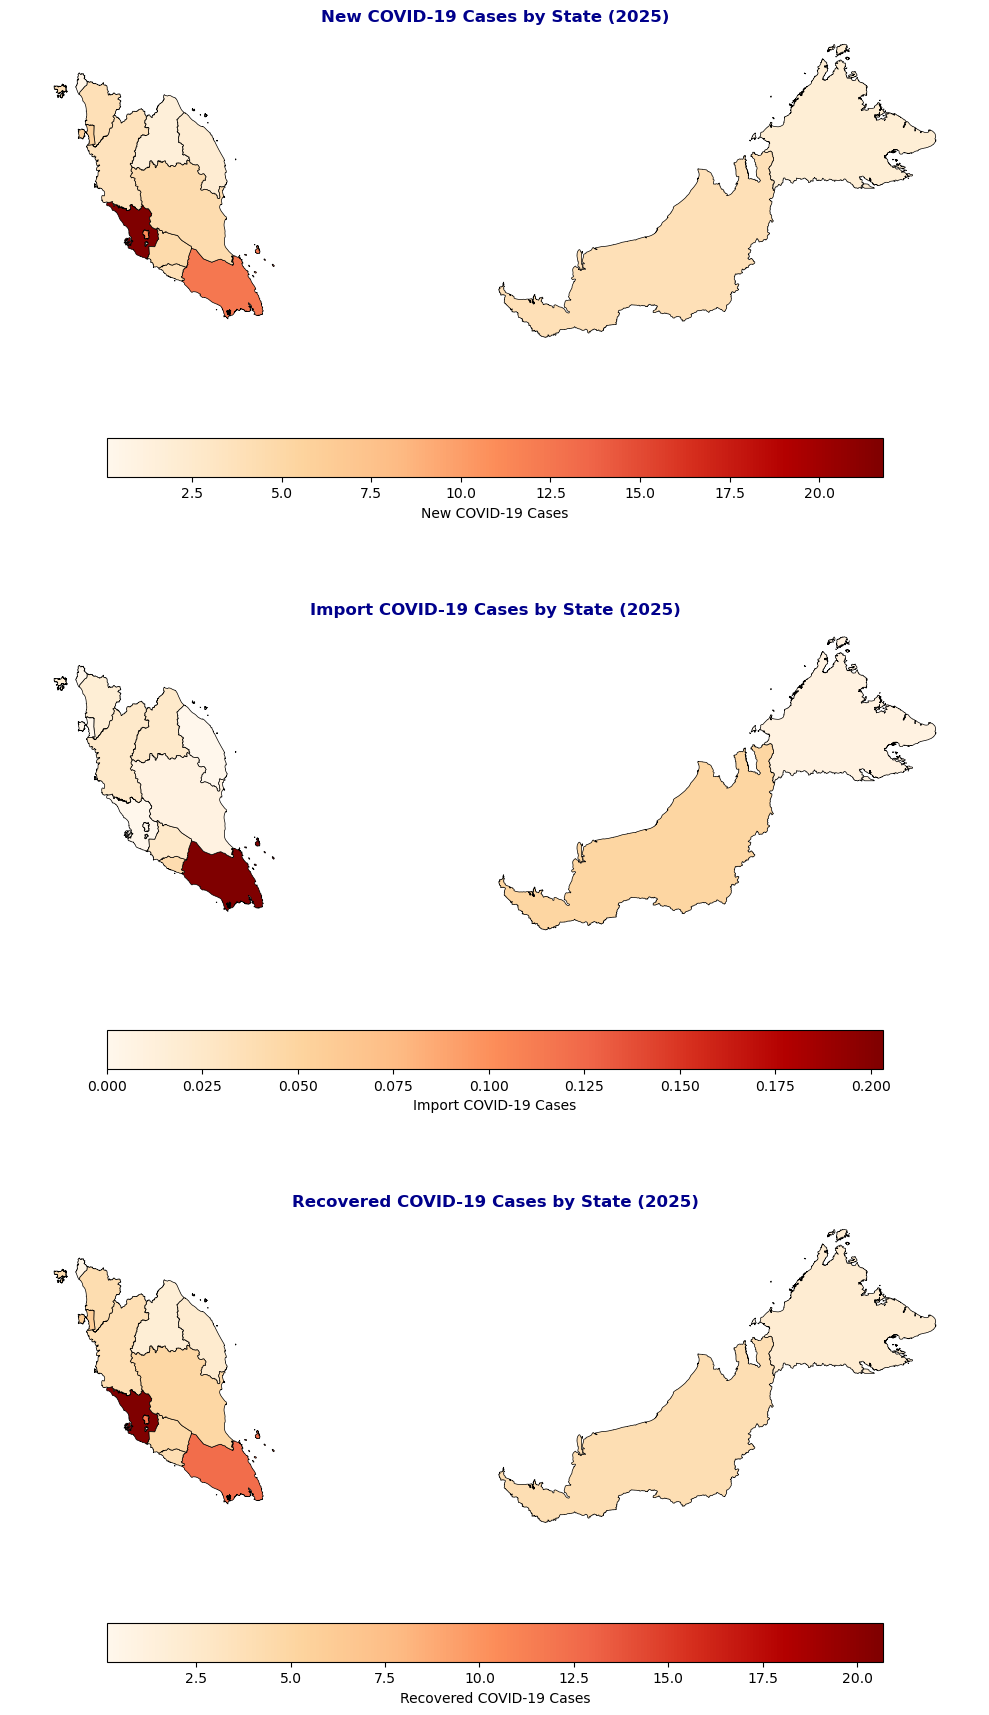

In [ ]:
# Load shapefile from GitHub
shapefile_path = "https://raw.githubusercontent.com/manarifz/MSc-Project-2-Data-Science/main/Shape%20File/malaysia%20state%20v2.shp"
gdf = gpd.read_file(shapefile_path)

# Filter COVID data for the year 2025 and exclude 'Malaysia' row
covid_2025 = covid_cases[(covid_cases['year'] == 2025) & (covid_cases['state'] != 'Malaysia')]

# Select only required columns
df_covid = covid_2025[['state', 'avg_new_cases', 'avg_import_cases', 'avg_cases_recovered']]

# Merge geospatial data with filtered COVID data
merged_gdf = gdf.merge(df_covid, on='state')

# Set up the plot with subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 18))  # 3 rows, 1 column
axes = axes.flatten()

# Columns to plot and their titles
columns_to_plot = ['avg_new_cases', 'avg_import_cases', 'avg_cases_recovered']
titles = ['New COVID-19 Cases', 'Import COVID-19 Cases', 'Recovered COVID-19 Cases']

# Plot each variable
for i, col in enumerate(columns_to_plot):
    ax = axes[i]
    merged_gdf.plot(column=col,
                    cmap='OrRd',
                    ax=ax,
                    legend=True,
                    legend_kwds={'label': titles[i], 'orientation': 'horizontal', 'shrink': 0.8},
                    edgecolor='black', linewidth=0.5)
    ax.set_title(f'{titles[i]} by State (2025)', fontsize=12, fontweight='bold', color='darkblue')
    ax.axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


The geographic heat maps presented for the year 2025 provide valuable insights into the spatial distribution of COVID-19 cases across Malaysia, highlighting critical regions that require ongoing surveillance and intervention. From the visualization, it is evident that Selangor, W.P. Kuala Lumpur, and Johor exhibit the highest densities of new, imported, and recovered COVID-19 cases. These states, therefore, can be designated as COVID-19 hotspots, and they demand sustained monitoring and targeted public health strategies.

Selangor and Kuala Lumpur are among the most urbanized and densely populated areas in Malaysia, with high levels of human mobility due to their roles as economic and administrative centers. This population density increases the risk of viral transmission, making containment more challenging (Ministry of Health Malaysia, 2021). The high number of imported cases in Johor is also logical, given its proximity to Singapore and the volume of cross-border travel, emphasizing the necessity of stringent border control measures and health screenings at points of entry (World Health Organization [WHO], 2022).

The presence of a relatively high number of recovered cases in these states suggests that while the healthcare systems have been responsive and effective, the elevated volume of new cases continues to strain resources. Hence, proactive strategies such as localized lockdowns, enhanced testing and tracing, and booster vaccination campaigns should be prioritized in these hotspot regions to curb further transmission (Centers for Disease Control and Prevention [CDC], 2023).

Designating and visualizing hotspot areas not only allows for efficient allocation of medical resources and personnel but also supports policy-making and public awareness campaigns. Visual data, like the maps shown, serve as practical tools for real-time decision-making and facilitate a more adaptive and responsive public health approach (WHO, 2023). Continued epidemiological mapping remains essential for anticipating and managing future outbreaks, especially in urban and border states.

References:

Centers for Disease Control and Prevention. (2023). Guidance for managing localized outbreaks of COVID-19. https://www.cdc.gov/coronavirus/2019-ncov/php/open-america/local-outbreaks.html

Ministry of Health Malaysia. (2021). COVID-19 Situation Report: Urban area risks and healthcare response. https://www.moh.gov.my/

World Health Organization. (2022). COVID-19 and border health measures. https://www.who.int/publications/i/item/WHO-2019-nCoV-border-health-2022.1

World Health Organization. (2023). Surveillance strategies for COVID-19 in hotspot regions. https://www.who.int/emergencies/diseases/novel-coronavirus-2019/surveillance

#### **4.4 Sexually Transmitted Diseases (STDs) Trends in Malaysia (2017 - 2022)**

**4.4.1 Trends of AIDS, Gonorrhea, HIV and Syphillis cases in Malaysia (2017 - 2022)**

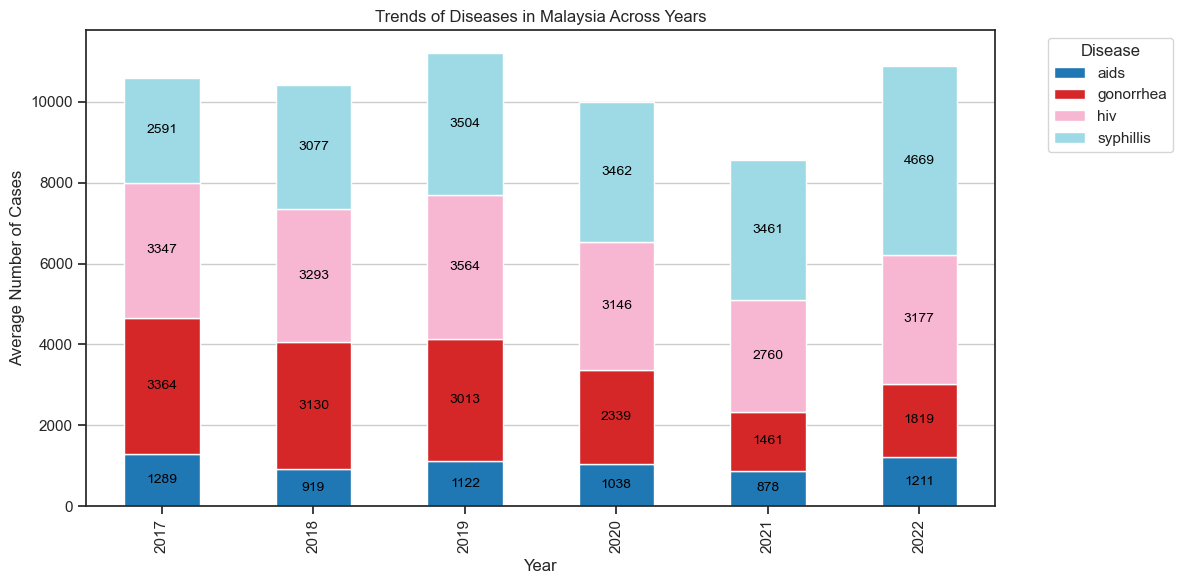

In [ ]:
# Filter out rows where state is 'Malaysia' and disease is not 'chancroid'
filtered_df = df[(df['state'] == 'Malaysia') & (df['disease'] != 'chancroid')]

# Group by year and disease to get the sum or average of cases
df_grouped = filtered_df.groupby(['year', 'disease'])['avg_cases'].sum().unstack(fill_value=0)

# Plot
ax = df_grouped.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title('Trends of Diseases in Malaysia Across Years')
plt.xlabel('Year')
plt.ylabel('Average Number of Cases')
plt.legend(title='Disease', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True, axis='y')

# Add value labels on each bar segment
for bar_index, year in enumerate(df_grouped.index):
    cumulative_height = 0
    for disease in df_grouped.columns:
        value = df_grouped.loc[year, disease]
        if value > 0:
            ax.text(
                bar_index, # X coordinate
                cumulative_height + value / 2, # Y coordinate at middle of segment
                str(int(value)), # Text
                ha='center', va='center', fontsize=10, color='black'
            )
        cumulative_height += value

plt.show()


The visual data on the trends of sexually transmitted diseases (STDs) in Malaysia from 2017 to 2022 provides a compelling narrative of how public health dynamics can shift significantly in response to external factors, particularly the COVID-19 pandemic. The graph highlights that cases of syphilis and HIV showed a steady increase from 2017 to 2019, suggesting either an actual rise in transmission or improved detection and reporting mechanisms during that period. In contrast, gonorrhea and AIDS cases showed a declining trend, potentially due to effective public health campaigns, improved access to healthcare, or changes in sexual behavior.

A significant decline in reported STD cases is observed across all categories in the years 2020 and 2021. This drop aligns temporally with the onset of the COVID-19 pandemic and the implementation of strict public health measures by the Malaysian government, such as the Movement Control Order (MCO), which restricted interpersonal interactions, travel, and social gatherings (Ministry of Health Malaysia, 2021). These restrictions likely led to reduced sexual activity, particularly casual or non-household interactions, thereby lowering the transmission opportunities for STDs. Similar patterns were noted globally, as social distancing and lockdown measures were associated with decreased reported cases of various STDs due to both reduced transmission and fewer people seeking testing (Centers for Disease Control and Prevention [CDC], 2021).

The data for 2022, however, shows a resurgence in STD cases—most notably a sharp increase in syphilis and HIV cases. This rebound could be attributed to several factors. Firstly, the relaxation of COVID-19 restrictions, including the reopening of borders and increased interstate travel, likely facilitated a return to pre-pandemic social behaviors, including intimate relationships. Secondly, with the establishment of widespread vaccination and a gradual return to normalcy, individuals may have resumed healthcare visits, leading to increased testing and reporting of STDs that went undetected during the pandemic (World Health Organization [WHO], 2022).

This trend underscores the importance of maintaining robust sexual health education, accessible STD screening, and public health surveillance even amidst other public health crises. It also highlights how shifts in policy and mobility can directly influence public health outcomes, especially for communicable diseases that depend heavily on human contact for transmission.

References:

Centers for Disease Control and Prevention. (2021). Impact of the COVID-19 Pandemic on STI Prevention Services and Reported STIs in the United States. https://www.cdc.gov/std/statistics/2021/overview.htm

Ministry of Health Malaysia. (2021). COVID-19: Movement Control Order and Public Health Response. https://www.moh.gov.my

World Health Organization. (2022). COVID-19 and the resurgence of non-COVID infectious diseases. https://www.who.int/news/item/27-07-2022-resurgence-of-infectious-diseases-post-pandemic

**4.4.2 Trends of Chancroid cases in Malaysia (2017 - 2022)**

In [103]:
filtered_df[filtered_df['disease'] == 'chancroid'].head(6)

,year,state,disease,avg_cases,avg_incidence
16,2017,Malaysia,chancroid,3.0,0.01
96,2018,Malaysia,chancroid,4.0,0.01
176,2019,Malaysia,chancroid,2.0,0.01
256,2020,Malaysia,chancroid,3.0,0.01
336,2021,Malaysia,chancroid,1.0,0.00
416,2022,Malaysia,chancroid,0.0,0.00


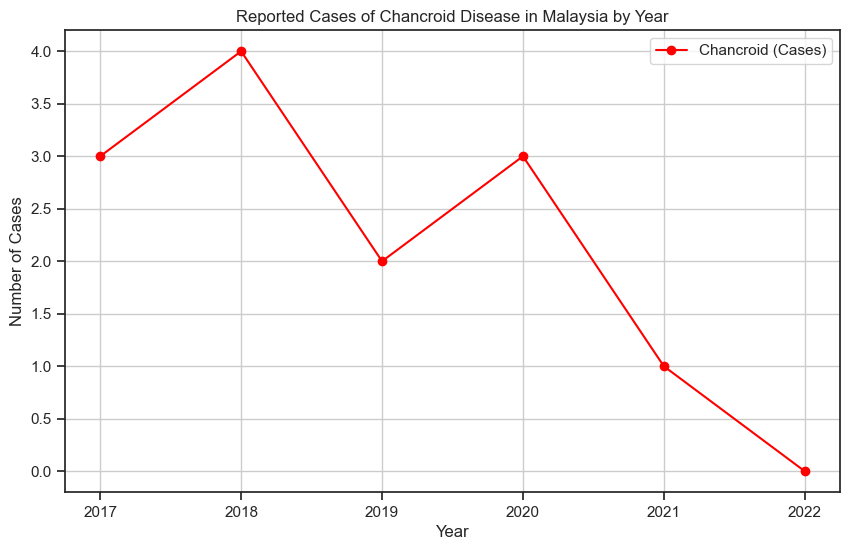

In [120]:
# Filter only for Malaysia
df_malaysia_2 = df[df['state'] == 'Malaysia'].sort_values(by='year')

# Filter data for each disease
chancroid = df_malaysia_2[df_malaysia_2['disease'] == 'chancroid']

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(chancroid['year'], chancroid['avg_cases'], marker='o', label='Chancroid (Cases)', color='red')

plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.title('Reported Cases of Chancroid Disease in Malaysia by Year')
plt.legend()
plt.grid(True)
plt.show()


The reported cases of chancroid in Malaysia between 2017 and 2022 reveal a consistently declining trend, with a noticeable drop to zero cases by 2022. Despite minor fluctuations between 2017 and 2020, the overall trajectory indicates effective control of the disease. Chancroid, a bacterial sexually transmitted infection caused by Haemophilus ducreyi, has become increasingly rare in many parts of the world due to several public health advancements. One of the primary reasons for the decline in chancroid cases is the widespread availability and use of effective antibiotic treatments, which can quickly cure the infection and reduce its transmission (World Health Organization [WHO], 2016).

Additionally, chancroid is more sensitive to improvements in public health infrastructure, including better diagnostics, sexual health education, and access to treatment, compared to viral STDs like HIV and syphilis which require long-term management or do not have a definitive cure. The consistent public health efforts in Malaysia, including targeted screening and contact tracing, may have further contributed to the successful containment of chancroid. The integration of syndromic management protocols in clinical settings—where patients presenting with genital ulcers are treated presumptively for chancroid, syphilis, and herpes—also plays a vital role in controlling chancroid without requiring laboratory confirmation in every case (Centers for Disease Control and Prevention [CDC], 2021).

Moreover, the decline in chancroid cases aligns with global epidemiological trends. According to international data, chancroid has become extremely rare in developed and developing nations alike due to a combination of improved healthcare services and changing sexual health behaviors (Hook & Handsfield, 2008). Therefore, the reduction in chancroid incidence in Malaysia may not solely reflect a cure, but rather a successful public health model combining prevention, education, and treatment.

References:

Centers for Disease Control and Prevention. (2021). Chancroid – 2021 STD Surveillance. https://www.cdc.gov/std/statistics/2021/chancroid.htm

Hook, E. W., & Handsfield, H. H. (2008). Chancroid and the Decline of a Once Common STD. Clinical Infectious Diseases, 46(S2), S114–S118. https://doi.org/10.1086/533589

World Health Organization. (2016). Sexually transmitted infections (STIs): Fact sheet. https://www.who.int/news-room/fact-sheets/detail/sexually-transmitted-infections-(stis)

#### **4.5 Number of STDs Cases By State (2022)**

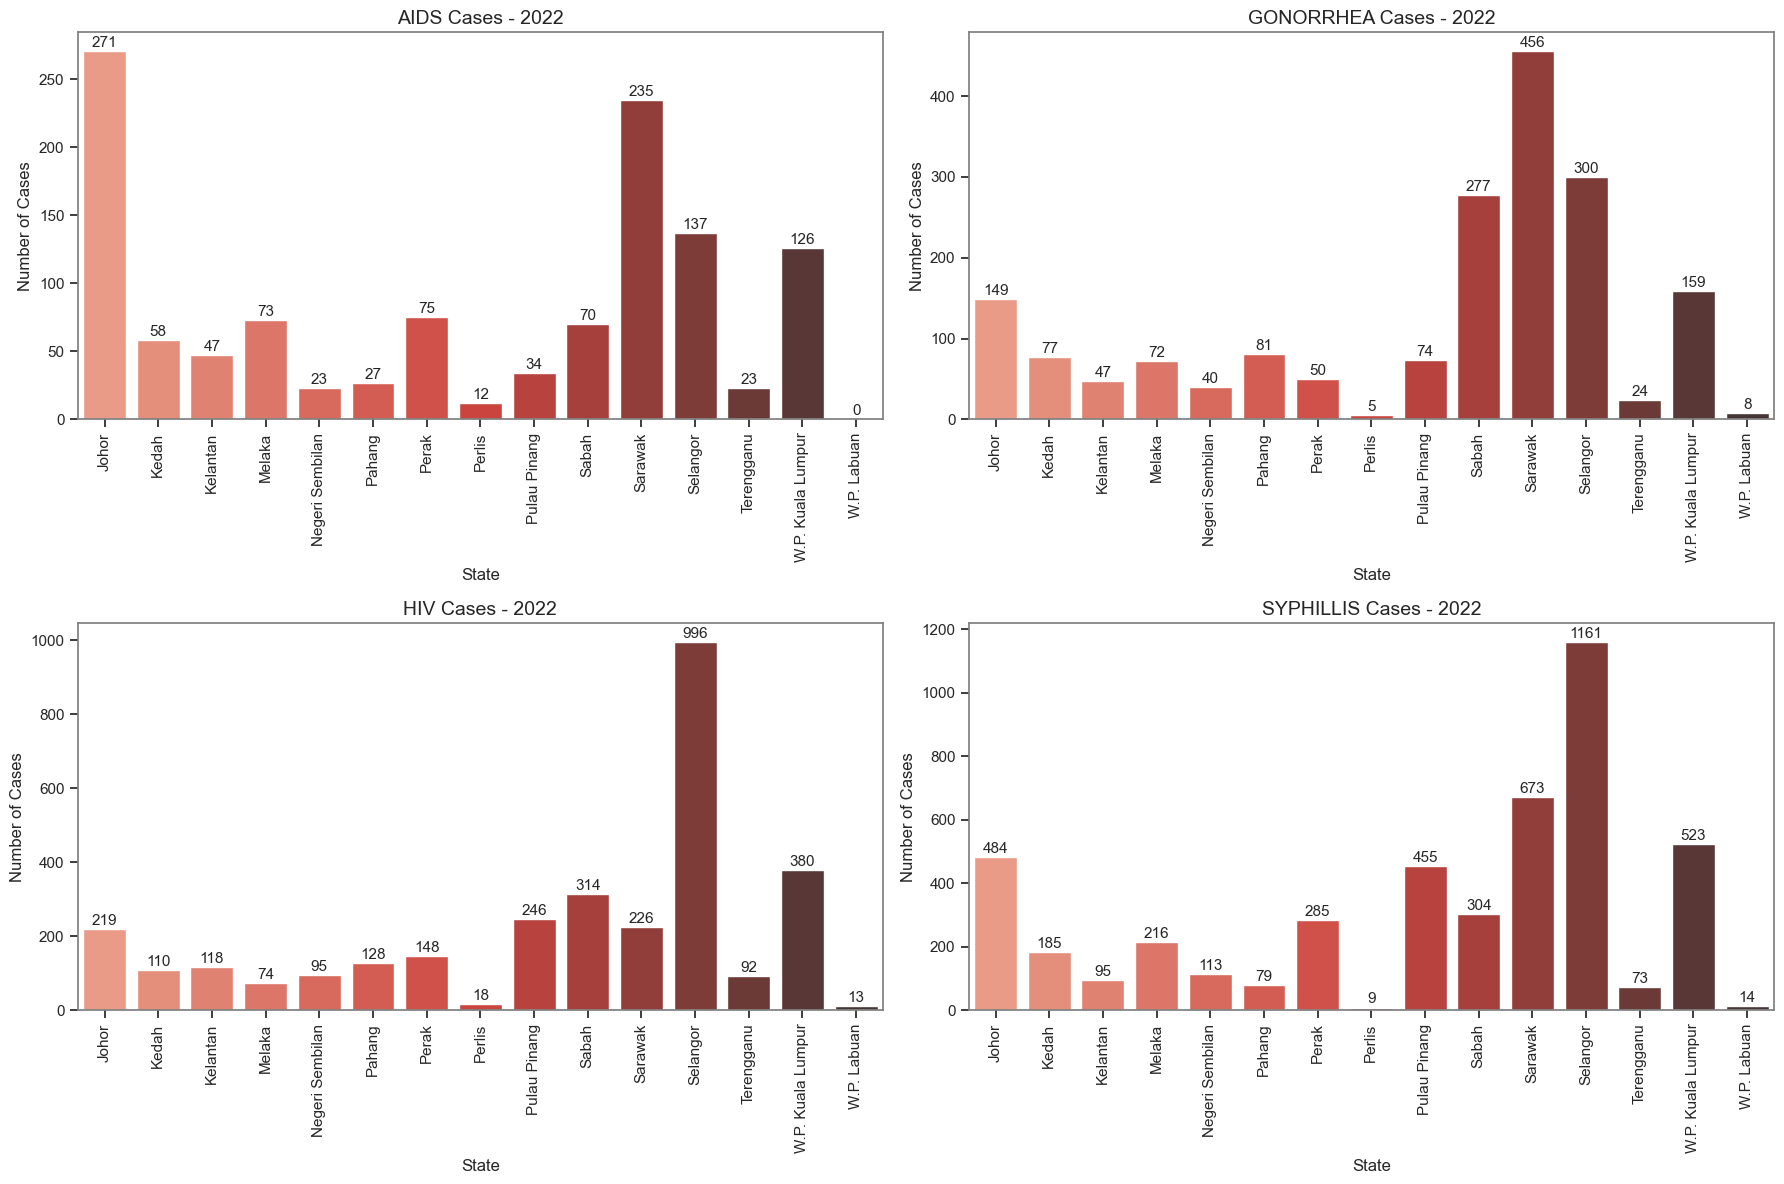

In [ ]:
# Filter the data for year 2022 and selected diseases
diseases_2022 = df[(df['state'] != 'Malaysia') & 
                   (df['year'] == 2022) & 
                   (df['disease'].isin(['aids', 'gonorrhea', 'hiv', 'syphillis']))]

# Ensure consistent style
sns.set(style="ticks")

# List of diseases to visualize
disease_list = ['aids', 'gonorrhea', 'hiv', 'syphillis']

# Create subplots (2 rows x 2 columns)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
axes = axes.flatten()

# Loop through each disease and plot on a separate subplot
for i, disease in enumerate(disease_list):
    ax = axes[i]
    data_disease = diseases_2022[diseases_2022['disease'] == disease]
    
    # Plot the barplot
    barplot = sns.barplot(
        data=data_disease,
        x='state',
        y='avg_cases',
        ax=ax,
        palette='Reds_d'
    )

    # Add value labels
    for container in barplot.containers:
        barplot.bar_label(container, fmt='%.0f', padding=0.75, fontsize=11)

    # Set titles and labels
    ax.set_title(f'{disease.upper()} Cases - 2022', fontsize=14)
    ax.set_xlabel('State')
    ax.set_ylabel('Number of Cases')
    ax.tick_params(axis='x', rotation=90)

    # Set plot border color
    for spine in ax.spines.values():
        spine.set_edgecolor('gray')

# Adjust layout
plt.tight_layout()
plt.show()


Based on the 2022 data, it is evident that the distribution of sexually transmitted diseases (STDs) such as AIDS, gonorrhea, HIV, and syphilis across Malaysian states is uneven, with certain states consistently reporting higher incidences. Among these, Selangor, Sarawak, W.P. Kuala Lumpur, and Johor emerge as the top contributors to the national burden of STDs. These patterns may be influenced by several socioeconomic and demographic factors including population density, urbanization, access to healthcare, and patterns of internal migration.

Selangor recorded the highest number of HIV (996 cases) and syphilis (1161 cases) cases, likely due to its status as the most populous and urbanized state in Malaysia. Urban centers tend to have higher transmission rates of STDs due to increased anonymity, higher population mobility, and more diverse sexual networks (World Health Organization [WHO], 2022). Selangor also offers more comprehensive healthcare facilities, leading to increased detection and reporting. Similarly, W.P. Kuala Lumpur, being a major metropolitan hub, reported high numbers across all STDs, including 380 HIV and 523 syphilis cases. These figures suggest that urbanization may correlate not only with increased transmission but also with better surveillance and reporting mechanisms.

Sarawak, which recorded the highest number of gonorrhea cases (456) and second highest AIDS cases (235), reflects a different scenario. While not as densely populated as Selangor or Kuala Lumpur, Sarawak’s relatively high STD figures may stem from challenges in healthcare access in remote and rural communities, leading to late diagnoses and ongoing transmission (Ministry of Health Malaysia, 2022). Additionally, cultural barriers and limited sexual health education in rural and indigenous communities may contribute to the persistence of STDs in this state.

Johor’s high AIDS (271) and syphilis (484) cases are also notable. Being a border state with significant cross-border movement and industrial employment, Johor is susceptible to increased sexual health risks among mobile populations, including foreign workers. Studies have shown that migrant populations often face limited access to preventive and treatment services, thereby increasing vulnerability to infections (UNAIDS, 2020).

In summary, the geographical distribution of STDs in Malaysia in 2022 underscores the impact of urbanization, healthcare accessibility, social mobility, and public health outreach on disease prevalence. These findings call for tailored regional strategies that consider local dynamics, enhance sexual health education, and improve access to testing and treatment to reduce the burden of STDs.

References:

Ministry of Health Malaysia. (2022). Health Facts 2022. https://www.moh.gov.my

UNAIDS. (2020). Migrant Health and HIV. https://www.unaids.org/en/resources/documents/2020/migrant-health-hiv

World Health Organization. (2022). Global progress report on HIV, viral hepatitis and sexually transmitted infections, 2021. https://www.who.int/publications/i/item/9789240027077




### **4.6 Demographic Visualization of STDs Cases Across State In Malaysia (2022)**

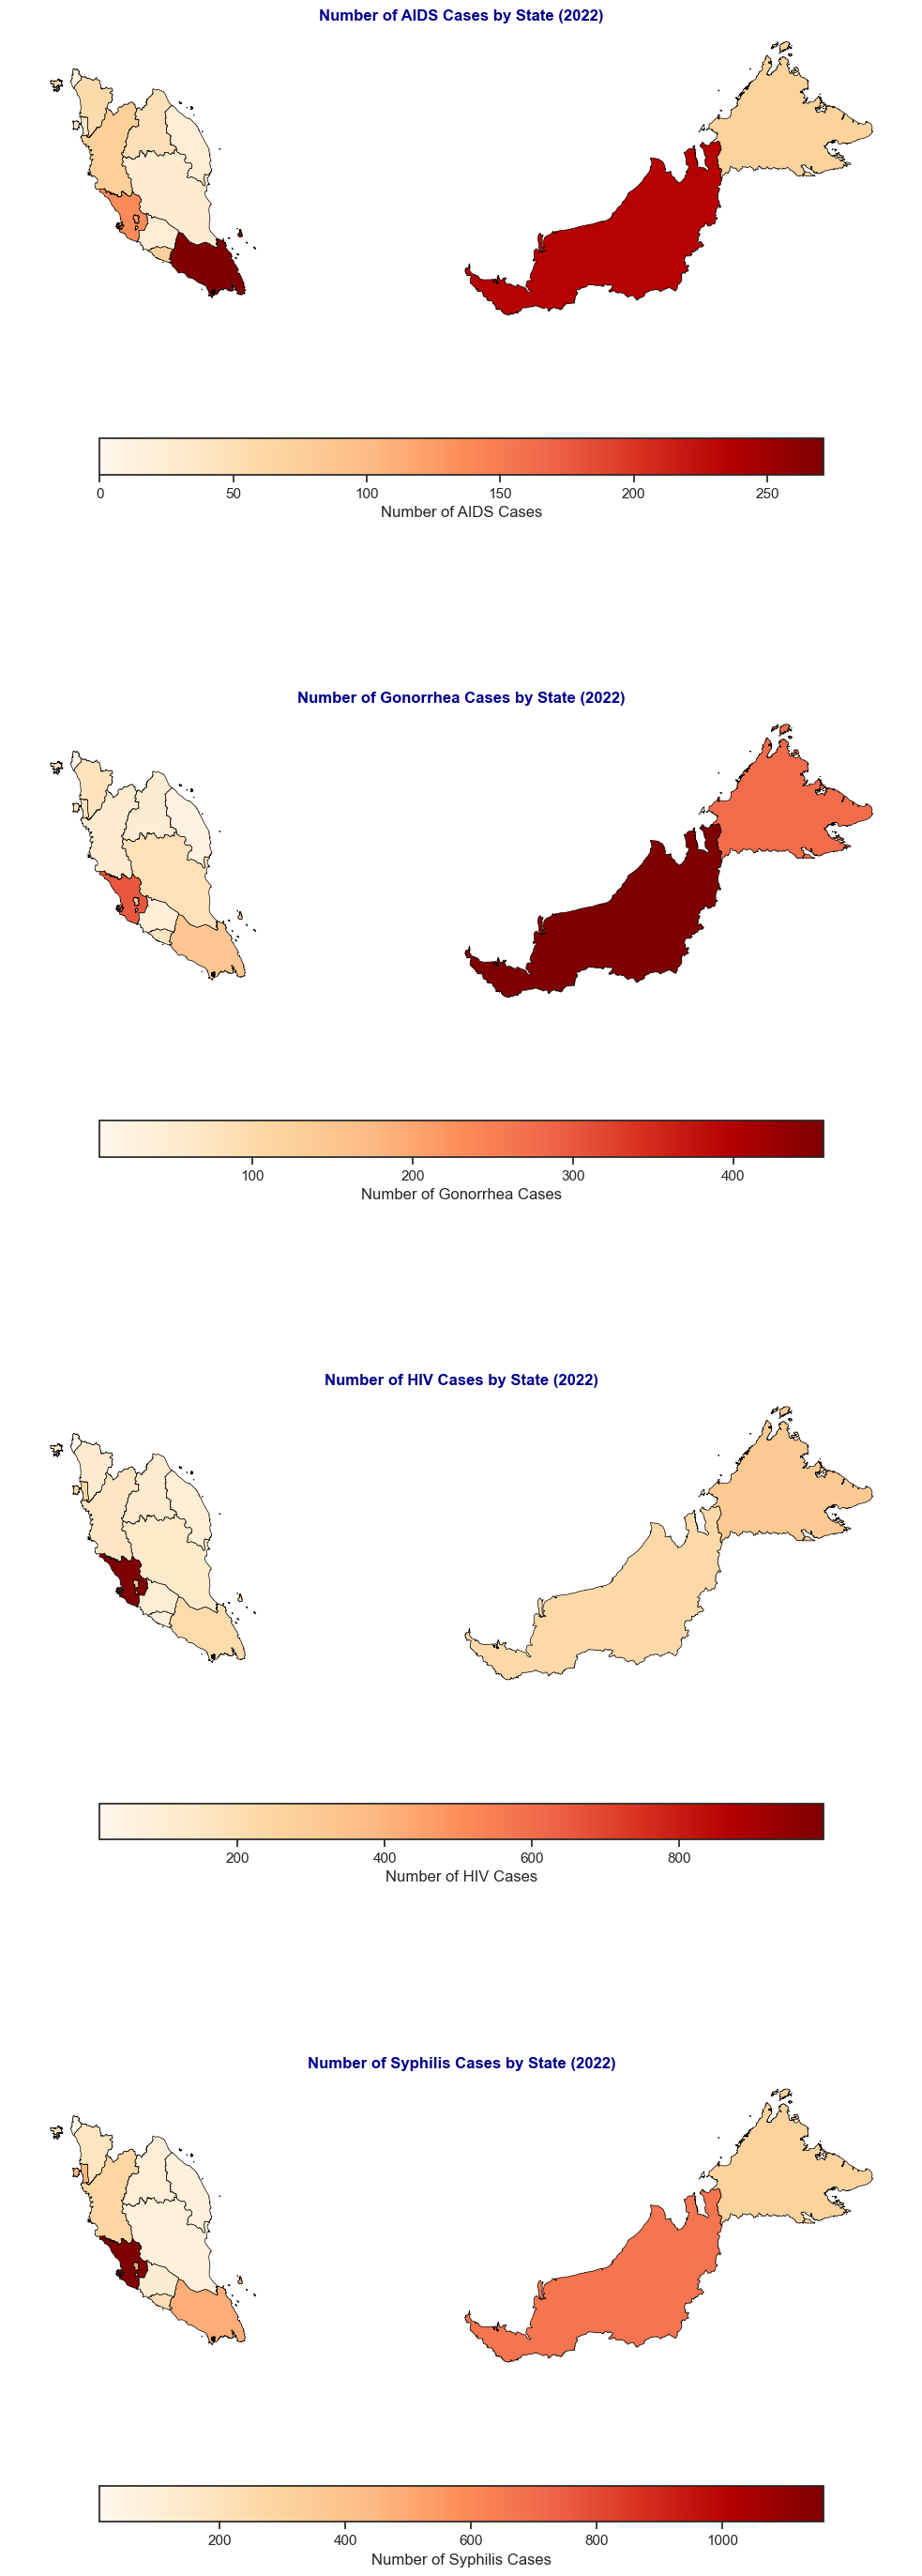

In [ ]:
# Load shapefile from GitHub
shapefile_path2 = "https://raw.githubusercontent.com/manarifz/MSc-Project-2-Data-Science/main/Shape%20File/malaysia%20state%20v2.shp"
gdf2 = gpd.read_file(shapefile_path2)

# List of diseases to map
diseases = ['aids', 'gonorrhea', 'hiv', 'syphillis']
titles = ['AIDS Cases', 'Gonorrhea Cases', 'HIV Cases', 'Syphilis Cases']

# Prepare subplots (5 rows x 1 column)
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 30))
axes = axes.flatten()

# Loop through each disease
for i, disease in enumerate(diseases):
    # Filter data
    disease_data = df[
        (df['year'] == 2022) &
        (df['state'] != 'Malaysia') &
        (df['disease'] == disease)
    ][['state', 'avg_cases']]

    # Merge with geospatial data
    merged_gdf = gdf2.merge(disease_data, on='state', how='left')

    # Plot
    ax = axes[i]
    merged_gdf.plot(column='avg_cases',
                    cmap='OrRd',
                    ax=ax,
                    legend=True,
                    legend_kwds={'label': f'Number of {titles[i]}', 'orientation': 'horizontal', 'shrink': 0.8},
                    edgecolor='black', linewidth=0.5)
    ax.set_title(f'Number of {titles[i]} by State (2022)', fontsize=12, fontweight='bold', color='darkblue')
    ax.axis('off')

# Layout adjustment
plt.tight_layout()
plt.show()

Demographic visualizations play a crucial role in identifying and responding to public health threats, particularly in the context of sexually transmitted diseases (STDs). The 2022 geographic heatmaps of Malaysia highlight specific states as high-burden or “hotspot” areas for AIDS, gonorrhea, HIV, and syphilis. These visual insights enable targeted interventions, where the Ministry of Health (MOH) can allocate resources more efficiently and deploy tailored public health campaigns to curb further transmission.

For AIDS cases, the maps and data identify Sarawak, Johor, Selangor, and W.P. Kuala Lumpur as critical hotspots. Sarawak and Johor’s high figures may be attributed to healthcare access challenges and population mobility, particularly among migrant and rural communities (Ministry of Health Malaysia, 2022). In contrast, the high numbers in urban centers like Selangor and Kuala Lumpur may stem from increased testing availability and higher risk behaviors commonly associated with urbanized environments (UNAIDS, 2020).

In the case of gonorrhea, Sabah, Sarawak, Selangor, and W.P. Kuala Lumpur emerge as key hotspots. This pattern aligns with areas that have either high internal migration or large youth populations, both of which are associated with increased STD transmission risks (World Health Organization [WHO], 2022). Sabah and Sarawak may also reflect under-addressed sexual health education and limited screening facilities in remote regions, contributing to late diagnoses and continued disease transmission.

The visual representation of HIV cases clearly indicates Selangor as the most prominent hotspot, with nearly 1,000 cases. This can be justified by Selangor’s status as the most densely populated and economically active state in Malaysia. Urbanization tends to correlate with higher HIV incidence due to a combination of social and economic factors including population mobility, greater anonymity in urban settings, and increased exposure to high-risk behaviors (WHO, 2022). Therefore, ongoing monitoring and prevention initiatives in Selangor are critical to controlling the spread of HIV at the national level.

For syphilis, the map highlights Selangor, W.P. Kuala Lumpur, Johor, Sarawak, Pulau Pinang, and Sabah as major hotspots. This broader spread suggests a resurgence of syphilis in both urban and semi-urban areas, which may reflect gaps in sexual health education, inconsistent use of protection, or insufficient access to regular STD screening services (CDC, 2021). Particularly in urban centers like Kuala Lumpur and Penang, lifestyle factors and more open sexual networks could be contributing to the rise in cases.

These demographic insights emphasize the importance of geographically focused interventions. Policies should prioritize hotspot regions with enhanced screening, public awareness campaigns, access to free or subsidized treatment, and comprehensive sexual health education. Integrating such visual data into health planning will allow the MOH to address STD outbreaks more effectively and prevent cross-state transmission.

References:

Ministry of Health Malaysia. (2022). Health Facts 2022. https://www.moh.gov.my

UNAIDS. (2020). Migrant Health and HIV. https://www.unaids.org/en/resources/documents/2020/migrant-health-hiv

World Health Organization. (2022). Global progress report on HIV, viral hepatitis and sexually transmitted infections, 2021. https://www.who.int/publications/i/item/9789240027077

Centers for Disease Control and Prevention. (2021). Sexually Transmitted Disease Surveillance 2020. https://www.cdc.gov/std/statistics

## **6.0 FUTURE RECOMMENDATIONS**

To strengthen public health surveillance and response mechanisms in Malaysia, it is essential to enhance the granularity and timeliness of infectious disease data, particularly for COVID-19 and sexually transmitted diseases (STDs). Future research should integrate additional socioeconomic, environmental, and demographic variables to provide deeper insights into the social determinants of disease spread. Establishing real-time data pipelines through centralized platforms such as MyGDX and National Health Data Dictionary (NHDD) can significantly improve the responsiveness of health interventions (Ministry of Health Malaysia, 2021). Moreover, collaboration with academic institutions and private health sectors is crucial to ensure data comprehensiveness and reduce underreporting. Advanced predictive modeling techniques, such as machine learning and geospatial analysis, should be employed to anticipate outbreaks and allocate resources efficiently (WHO, 2020). Finally, public health education campaigns tailored to high-risk states like Selangor and Sabah should be prioritized to reduce STD transmission, coupled with mobile outreach and accessible testing services, especially among youth and underserved populations (CDC, 2022).

## **7.0 CONCLUSION**

This study has demonstrated the value of integrating infectious disease datasets with spatial and temporal analysis tools to reveal critical trends in Malaysia's public health landscape. The analysis of COVID-19 and STD cases across Malaysian states revealed significant geographic disparities and temporal patterns, highlighting the vulnerability of densely populated and economically active regions. Apache Hive proved effective for data preprocessing and Matplotlib, seaborn and geopandas for visualization, enabling clear identification of disease hotspots and potential correlations. These insights are vital for informing targeted interventions, optimizing health resource allocation, and shaping future public health strategies. As Malaysia continues to face evolving health challenges, data-driven decision-making must remain at the core of national policy to ensure equitable and effective health outcomes for all citizens.

## **8.0 ADDITIONAL SUPPLEMENTARY DATA**

#### **8.1 AIDS Cases By State (2017 - 2022)**

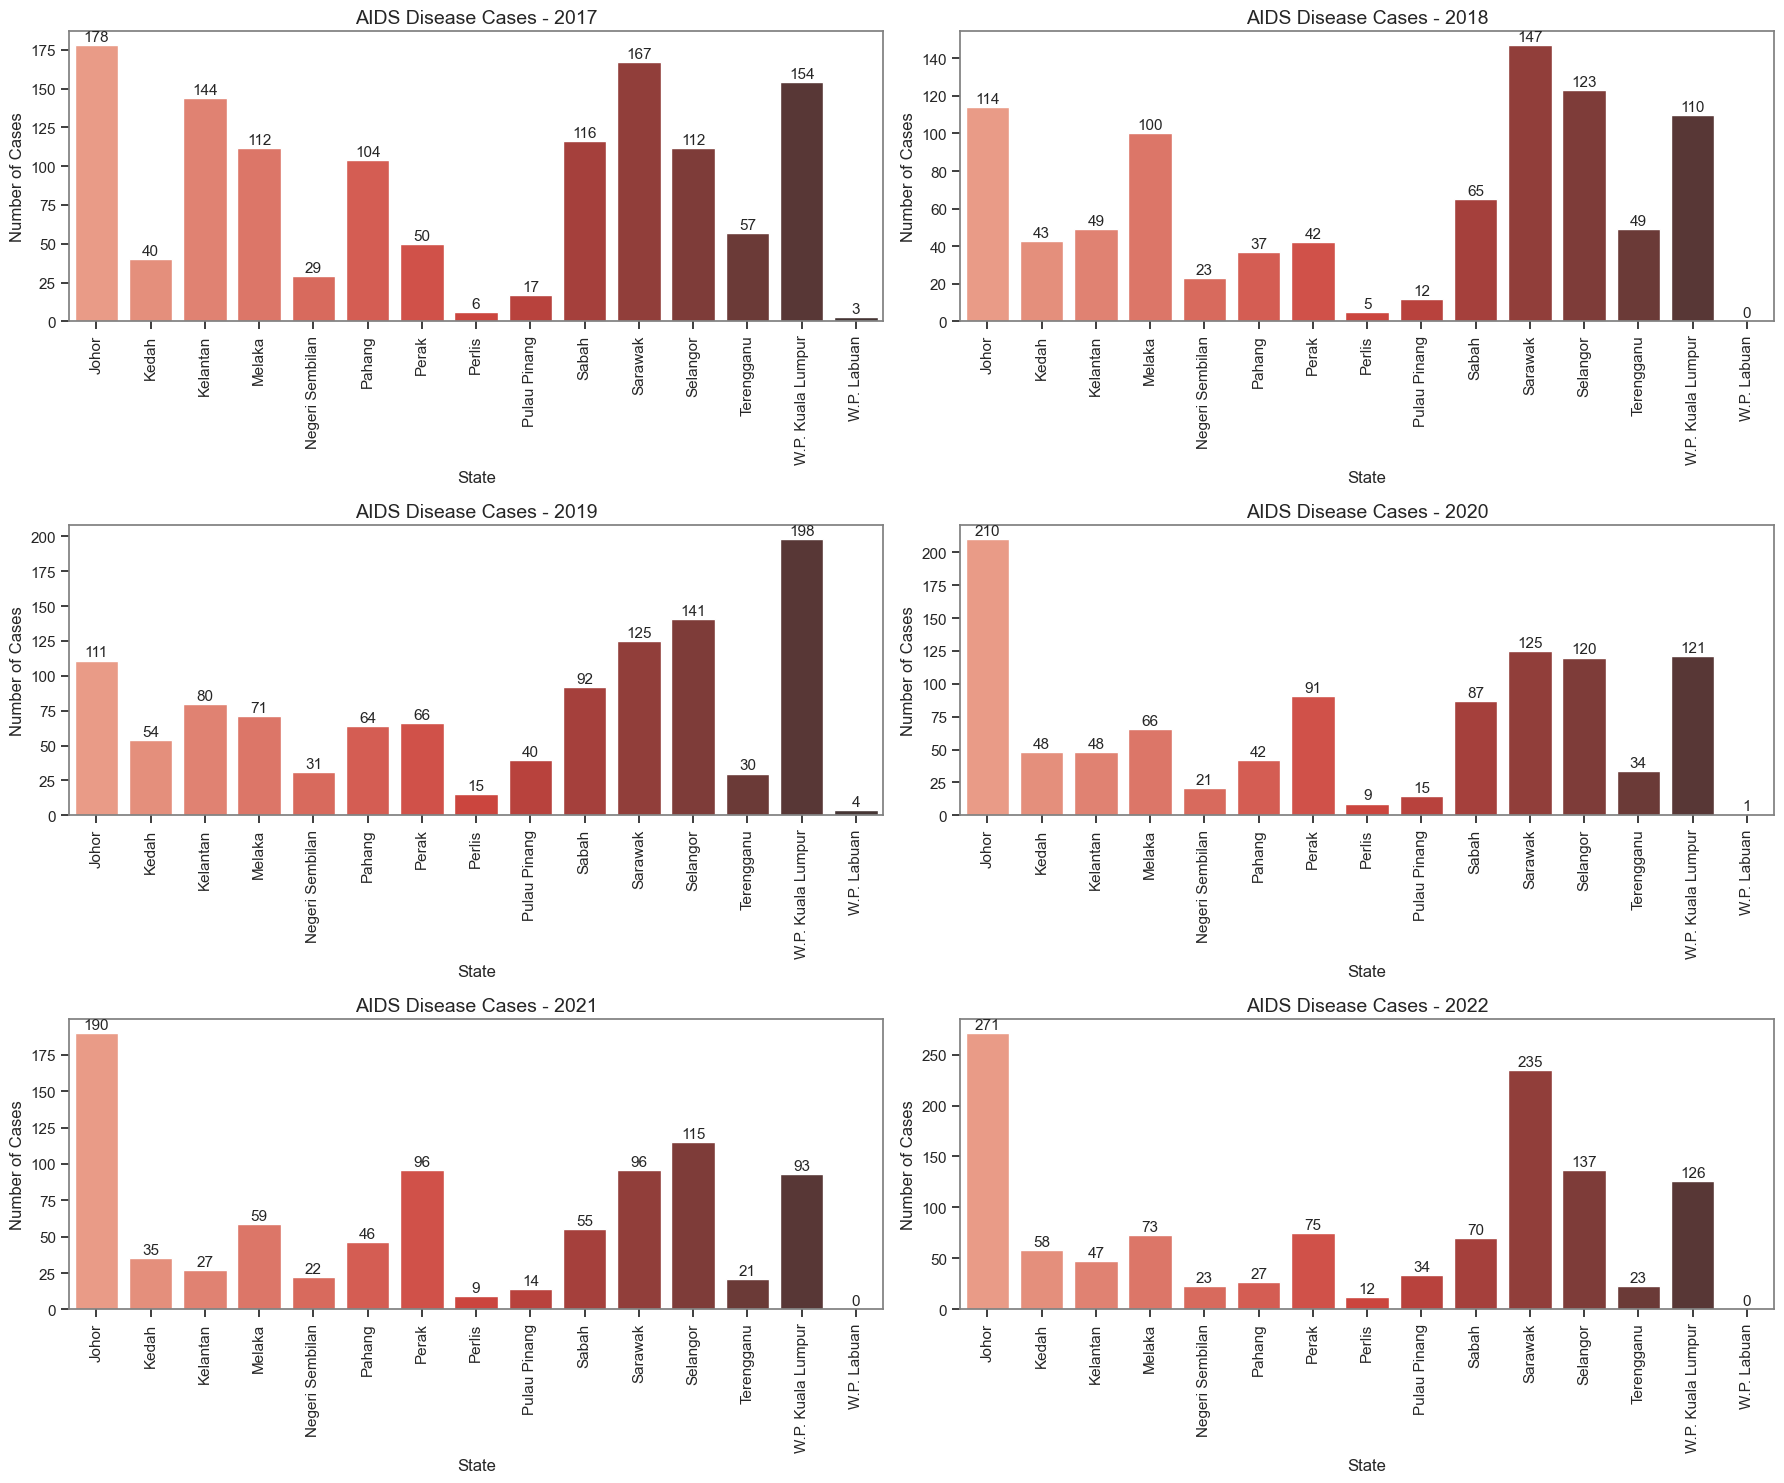

In [153]:
aids = df[(df['state'] != 'Malaysia') & (df['disease'] == 'aids')]

# Ensure consistent style
sns.set(style="ticks")

# Define the years to visualize
years = [2017, 2018, 2019, 2020, 2021, 2022]

# Create subplots (3 rows x 2 columns)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 15))
axes = axes.flatten()

# Loop through each year and plot on a separate subplot
for i, year in enumerate(years):
    ax = axes[i]
    data_year = aids[aids['year'] == year]
   
    # Plot the barplot
    barplot = sns.barplot(
        data=data_year,
        x='state',
        y='avg_cases',
        ax=ax,
        palette='Reds_d'
    )
    
    # Add value labels to the top of each bar
    for container in barplot.containers:
        barplot.bar_label(container, fmt='%.0f', padding=0.75, fontsize=11)

    # Set titles and labels
    ax.set_title(f'AIDS Disease Cases - {year}', fontsize=14)
    ax.set_xlabel('State')
    ax.set_ylabel('Number of Cases')
    ax.tick_params(axis='x', rotation=90)

    # Set all plot borders to gray
    for spine in ax.spines.values():
        spine.set_edgecolor('gray')

# Adjust layout
plt.tight_layout()
plt.show()

#### **8.2 Gonorrhea Cases By State (2017 - 2022)**

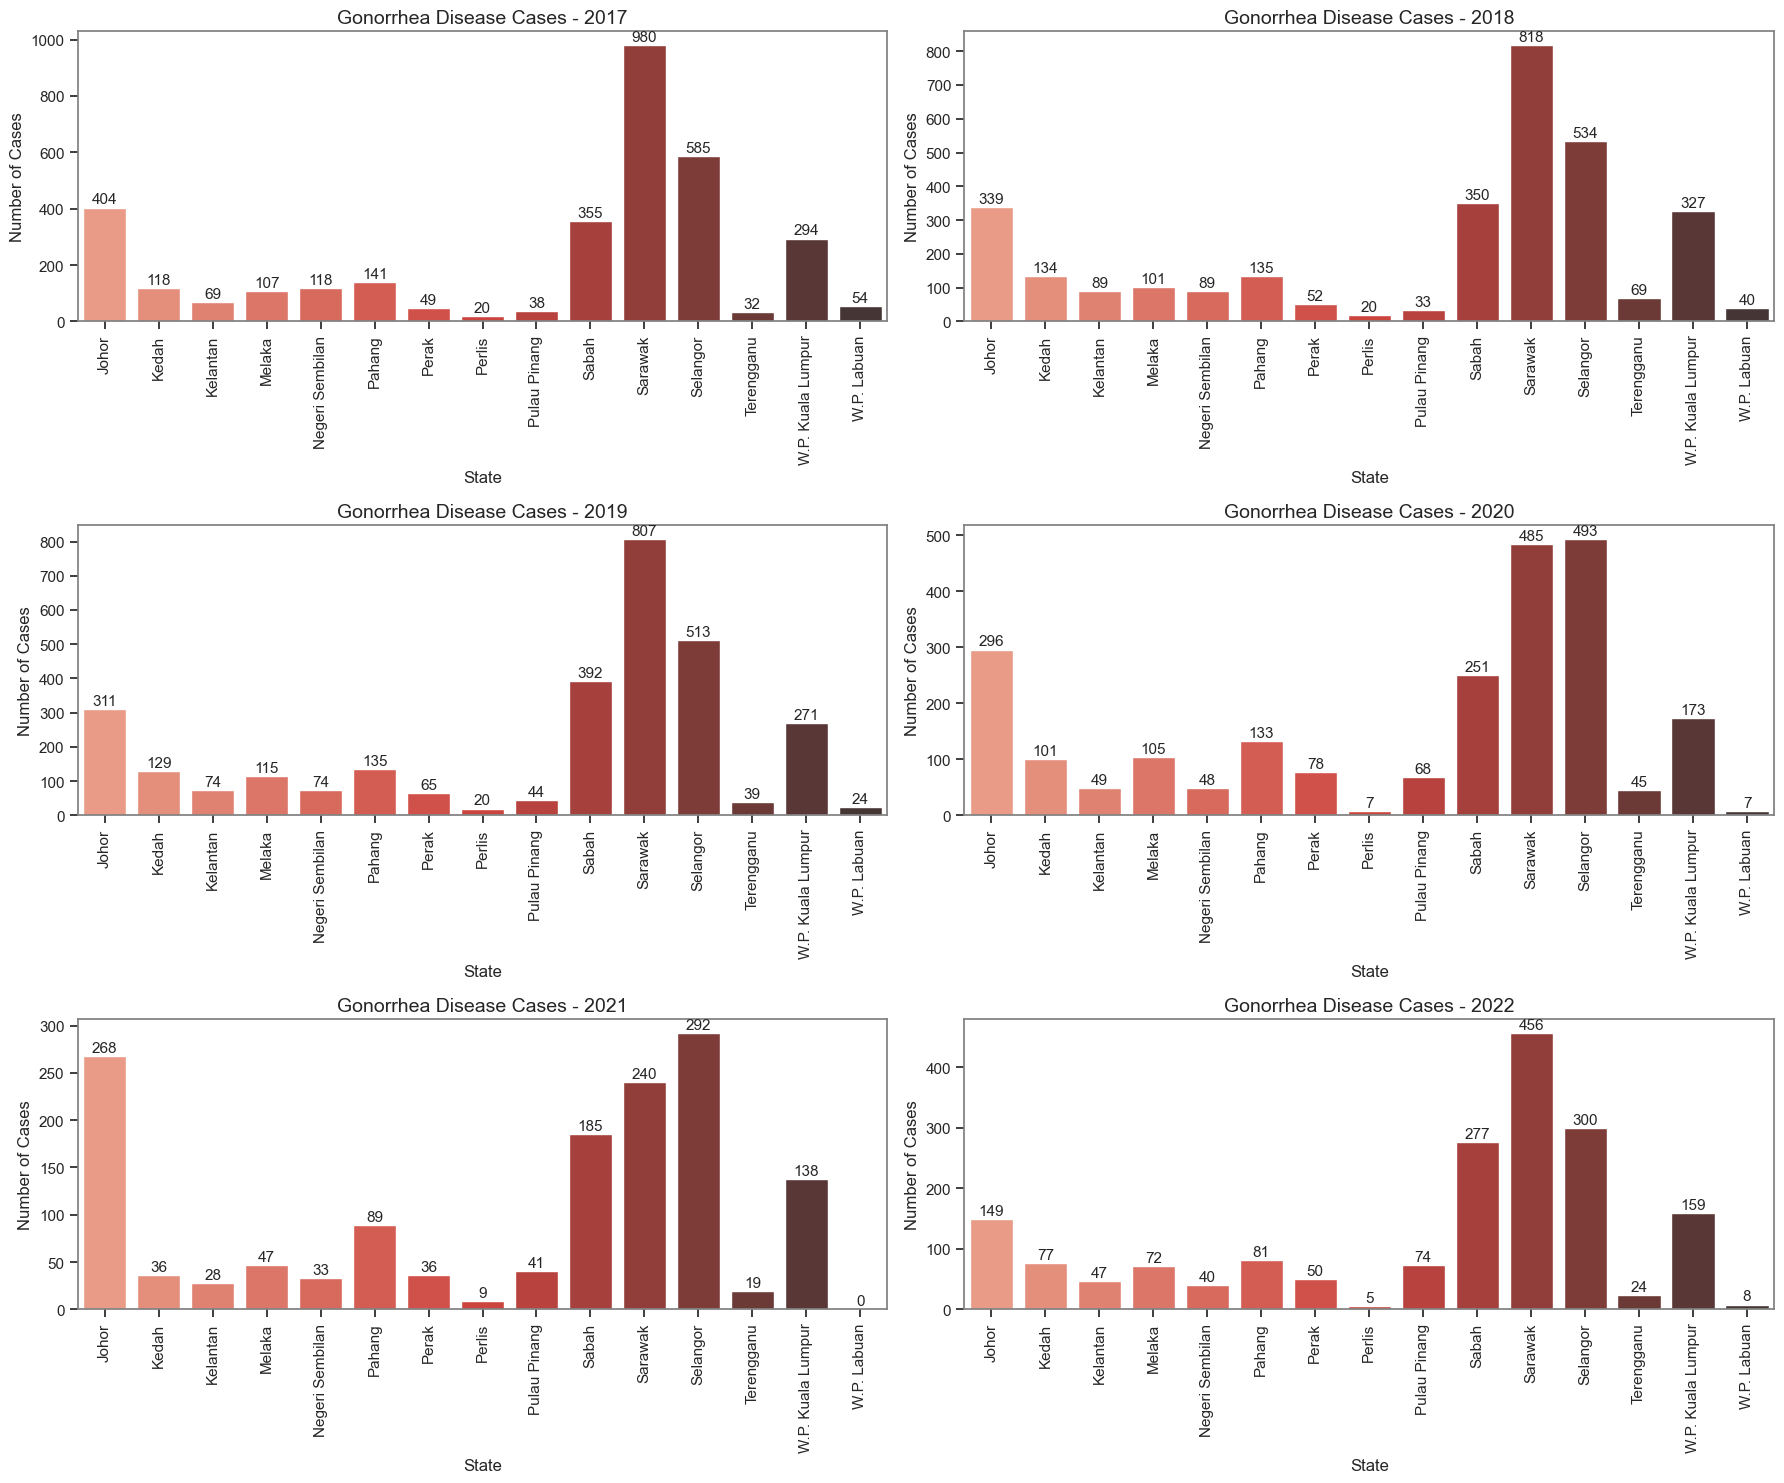

In [154]:
gonorrhea = df[(df['state'] != 'Malaysia') & (df['disease'] == 'gonorrhea')]

# Ensure consistent style
sns.set(style="ticks")

# Define the years to visualize
years = [2017, 2018, 2019, 2020, 2021, 2022]

# Create subplots (3 rows x 2 columns)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 15))
axes = axes.flatten()

# Loop through each year and plot on a separate subplot
for i, year in enumerate(years):
    ax = axes[i]
    data_year = gonorrhea[gonorrhea['year'] == year]
   
    # Plot the barplot
    barplot = sns.barplot(
        data=data_year,
        x='state',
        y='avg_cases',
        ax=ax,
        palette='Reds_d'
    )
    
    # Add value labels to the top of each bar
    for container in barplot.containers:
        barplot.bar_label(container, fmt='%.0f', padding=0.75, fontsize=11)

    # Set titles and labels
    ax.set_title(f'Gonorrhea Disease Cases - {year}', fontsize=14)
    ax.set_xlabel('State')
    ax.set_ylabel('Number of Cases')
    ax.tick_params(axis='x', rotation=90)

    # Set all plot borders to gray
    for spine in ax.spines.values():
        spine.set_edgecolor('gray')

# Adjust layout
plt.tight_layout()
plt.show()

#### **8.3 HIV Cases By State (2017 - 2022)**

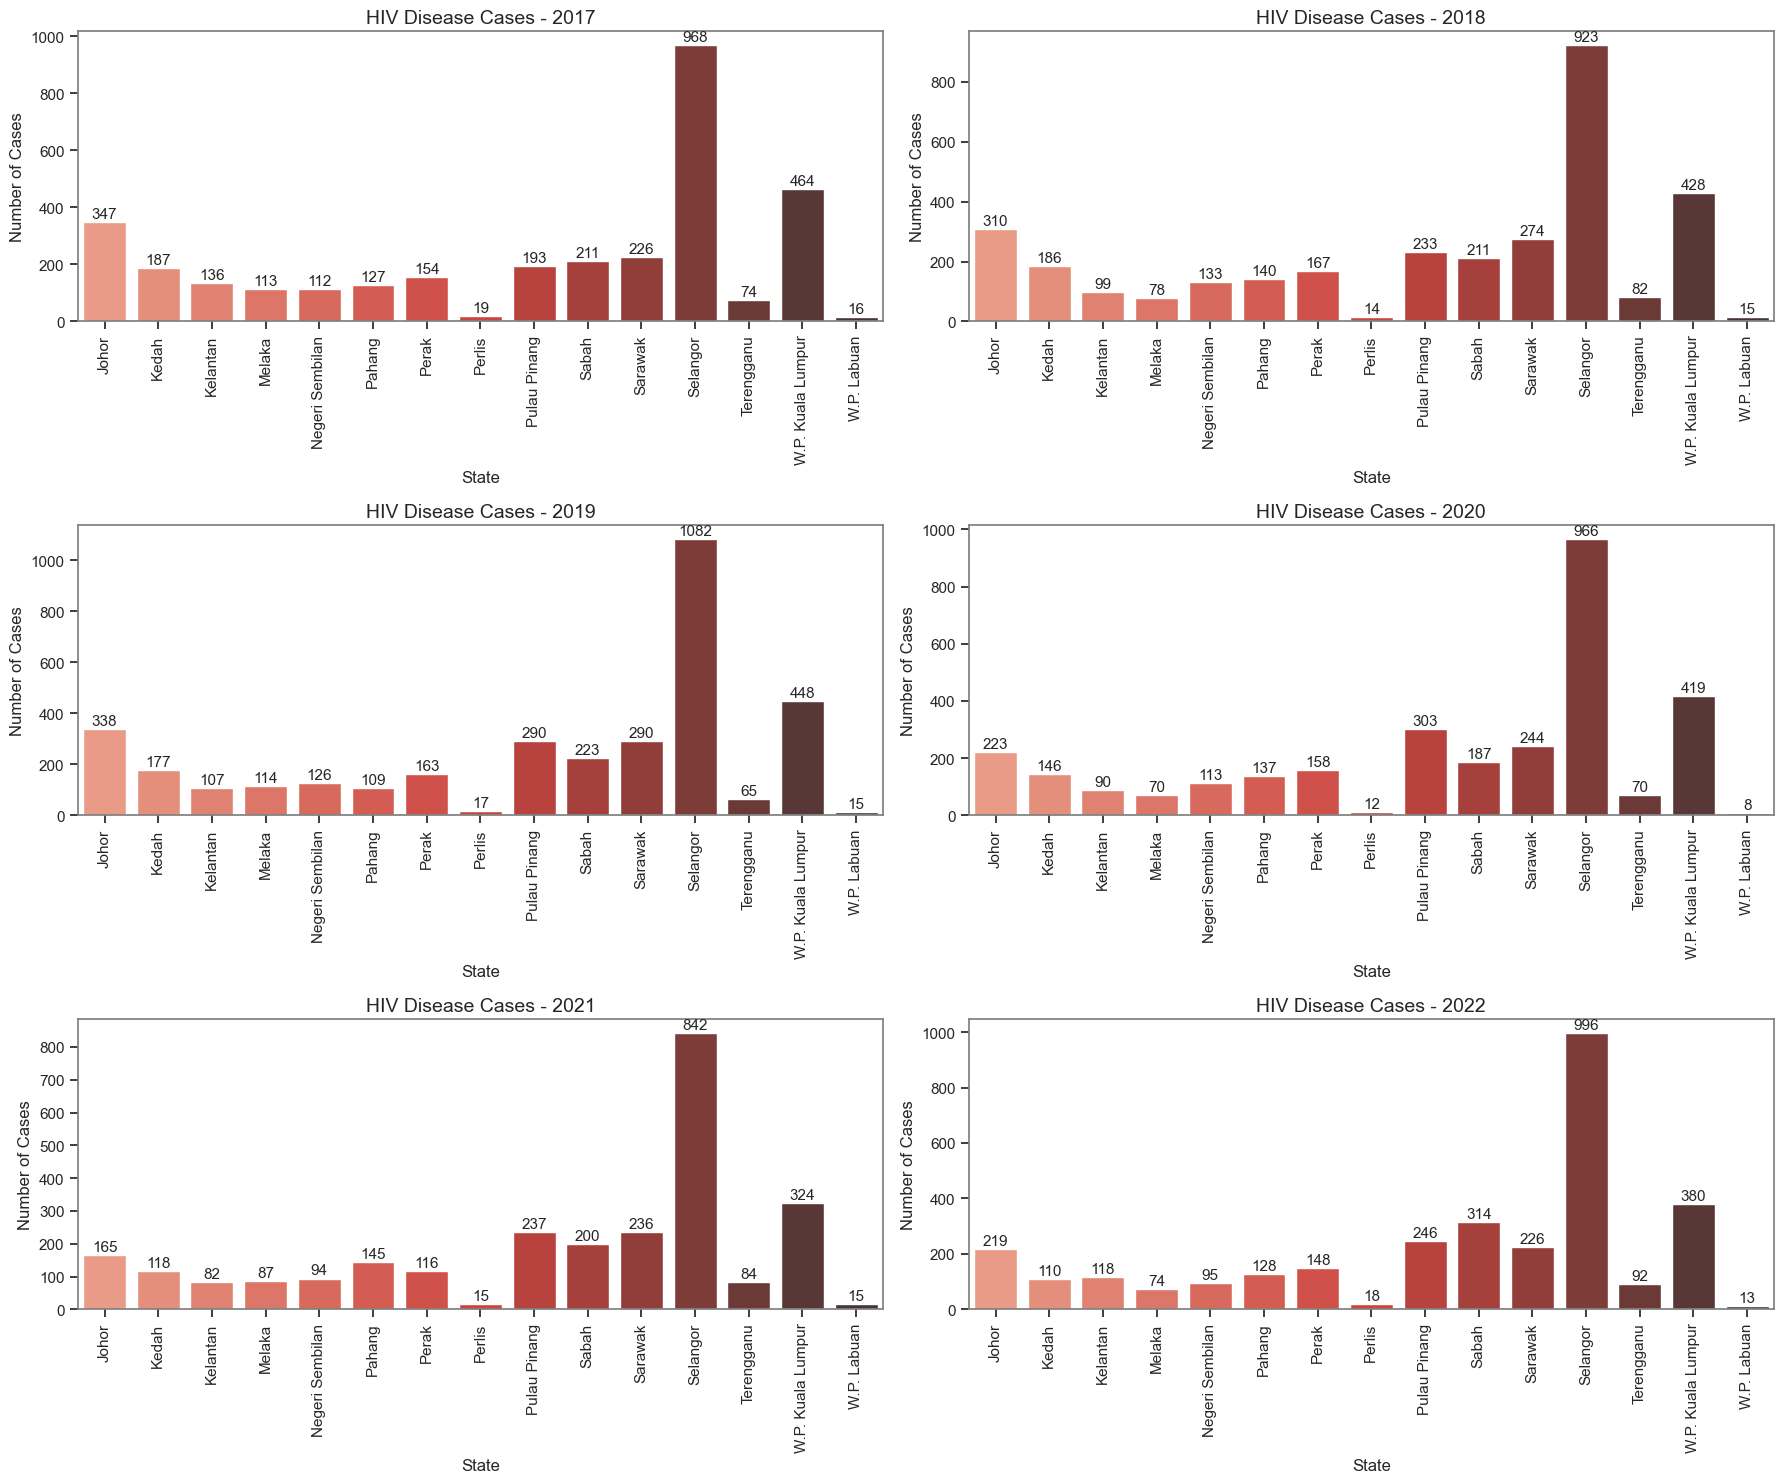

In [155]:
hiv = df[(df['state'] != 'Malaysia') & (df['disease'] == 'hiv')]

# Ensure consistent style
sns.set(style="ticks")

# Define the years to visualize
years = [2017, 2018, 2019, 2020, 2021, 2022]

# Create subplots (3 rows x 2 columns)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 15))
axes = axes.flatten()

# Loop through each year and plot on a separate subplot
for i, year in enumerate(years):
    ax = axes[i]
    data_year = hiv[hiv['year'] == year]
   
    # Plot the barplot
    barplot = sns.barplot(
        data=data_year,
        x='state',
        y='avg_cases',
        ax=ax,
        palette='Reds_d'
    )
    
    # Add value labels to the top of each bar
    for container in barplot.containers:
        barplot.bar_label(container, fmt='%.0f', padding=0.75, fontsize=11)

    # Set titles and labels
    ax.set_title(f'HIV Disease Cases - {year}', fontsize=14)
    ax.set_xlabel('State')
    ax.set_ylabel('Number of Cases')
    ax.tick_params(axis='x', rotation=90)

    # Set all plot borders to gray
    for spine in ax.spines.values():
        spine.set_edgecolor('gray')

# Adjust layout
plt.tight_layout()
plt.show()

#### **8.4 Syphillis Cases By State (2017 - 2022)**

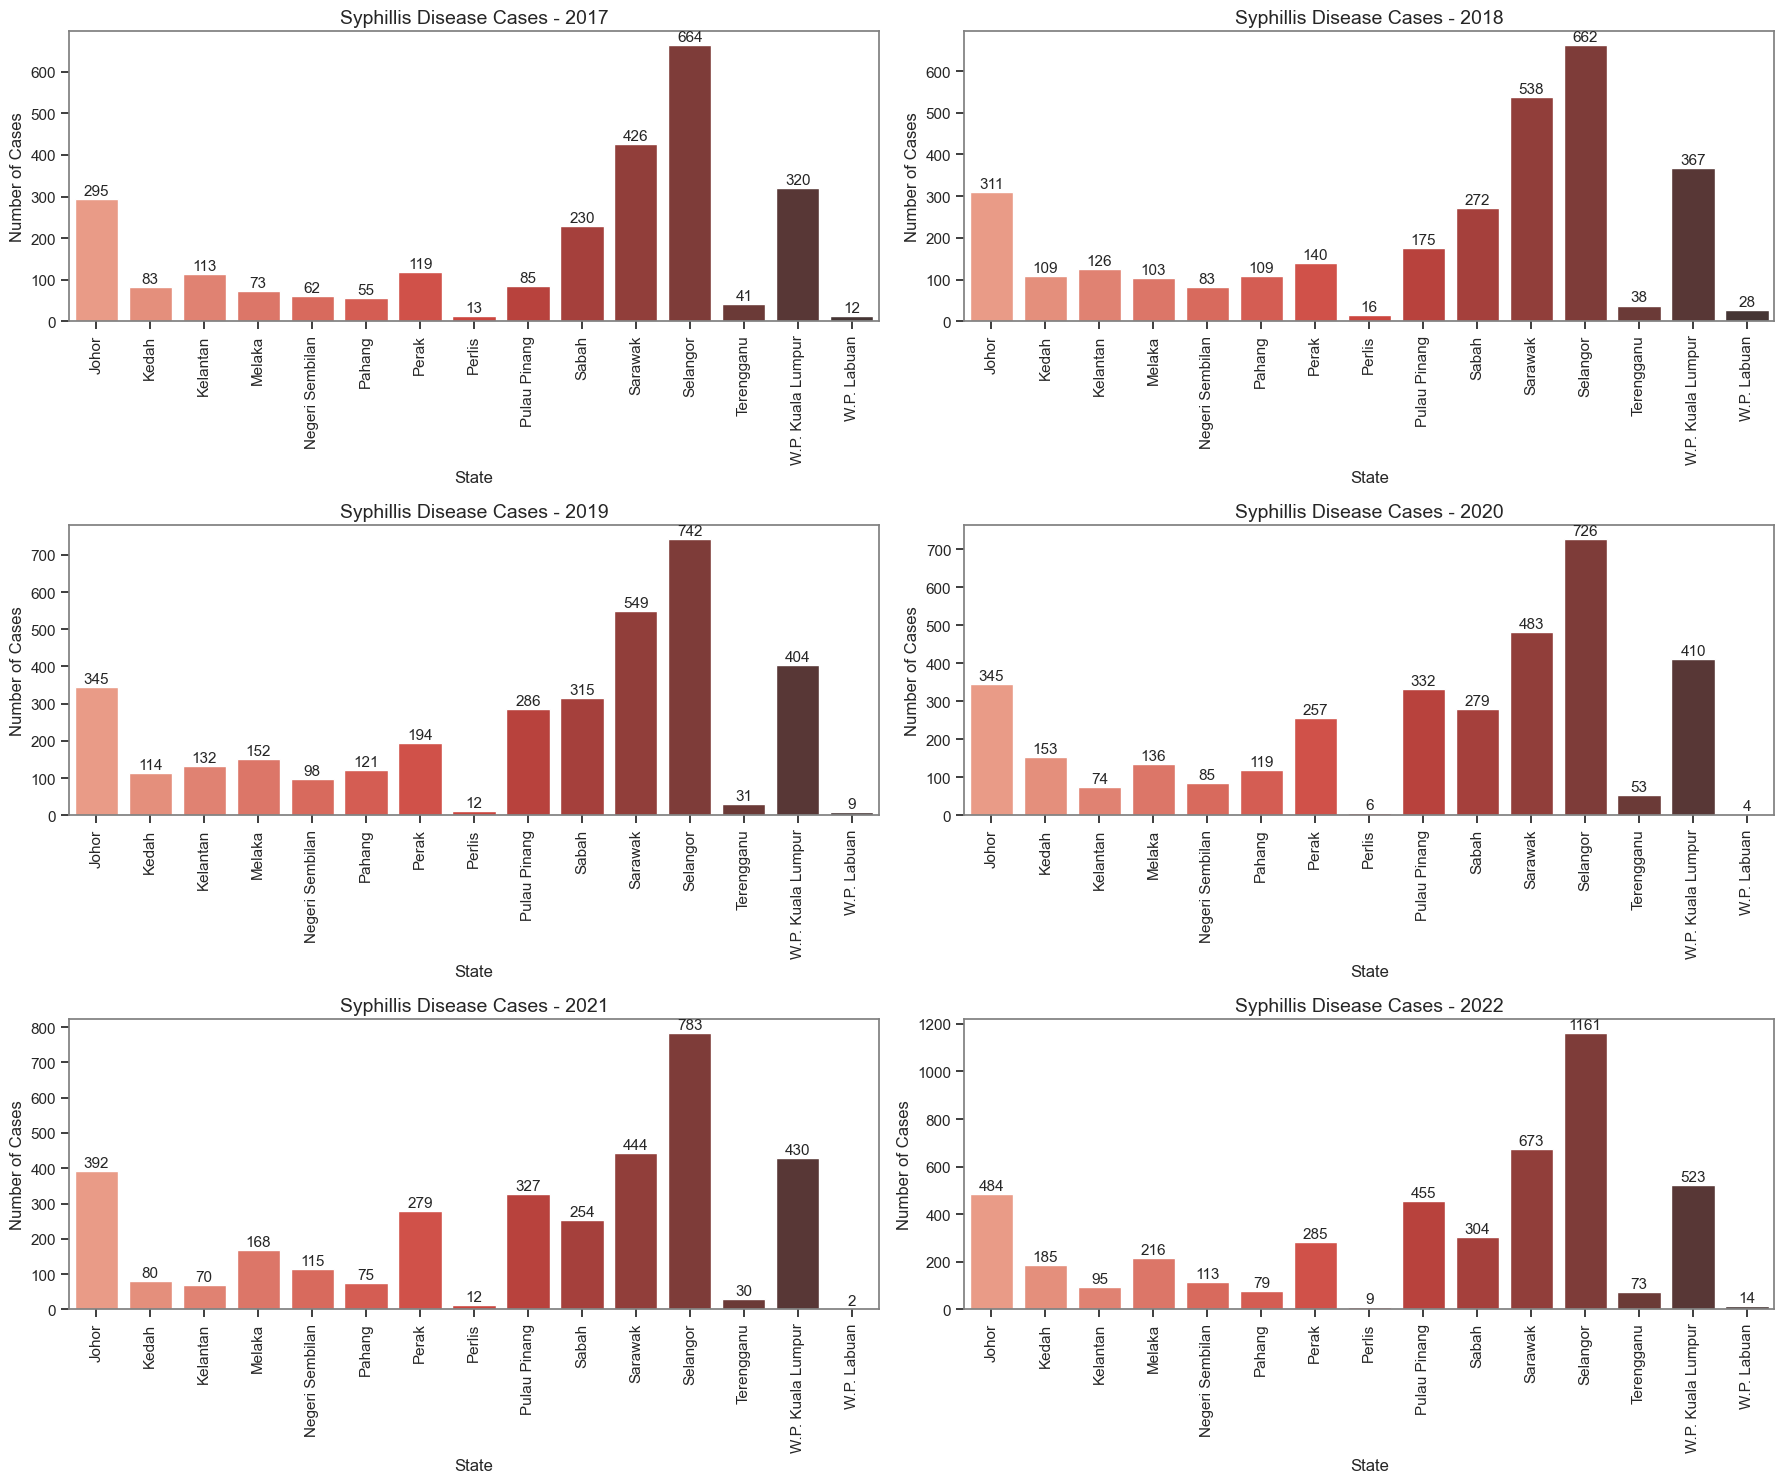

In [156]:
syphillis = df[(df['state'] != 'Malaysia') & (df['disease'] == 'syphillis')]

# Ensure consistent style
sns.set(style="ticks")

# Define the years to visualize
years = [2017, 2018, 2019, 2020, 2021, 2022]

# Create subplots (3 rows x 2 columns)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 15))
axes = axes.flatten()

# Loop through each year and plot on a separate subplot
for i, year in enumerate(years):
    ax = axes[i]
    data_year = syphillis[syphillis['year'] == year]
   
    # Plot the barplot
    barplot = sns.barplot(
        data=data_year,
        x='state',
        y='avg_cases',
        ax=ax,
        palette='Reds_d'
    )
    
    # Add value labels to the top of each bar
    for container in barplot.containers:
        barplot.bar_label(container, fmt='%.0f', padding=0.75, fontsize=11)

    # Set titles and labels
    ax.set_title(f'Syphillis Disease Cases - {year}', fontsize=14)
    ax.set_xlabel('State')
    ax.set_ylabel('Number of Cases')
    ax.tick_params(axis='x', rotation=90)

    # Set all plot borders to gray
    for spine in ax.spines.values():
        spine.set_edgecolor('gray')

# Adjust layout
plt.tight_layout()
plt.show()